In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df = pd.read_csv('movie_df.csv')

In [118]:
df

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes,genre1,genre2,profit,profit_to_budget
0,42,2018,Black Panther,200000000,700059566,1348258224,tt1825683,Black Panther,134.0,Action,Adventure,1148258224,5.741291
1,7,2018,Avengers Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,149.0,Action,Adventure,1748134200,5.827114
2,34,2015,Jurassic World,215000000,652270625,1648854864,tt0369610,Jurassic World,124.0,Action,Adventure,1433854864,6.669092
3,27,2012,The Avengers,225000000,623279547,1517935897,tt0848228,The Avengers,143.0,Action,Adventure,1292935897,5.746382
4,44,2018,Incredibles 2,200000000,608581744,1242520711,tt3606756,Incredibles 2,118.0,Action,Adventure,1042520711,5.212604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,45,2013,The Christmas Candle,7000000,1632000,1933829,tt2739338,The Christmas Candle,100.0,Drama,Family,-5066171,-0.723739
832,73,2012,Your Sisters Sister,120000,1597486,3090593,tt1742336,Your Sister's Sister,90.0,Comedy,Drama,2970593,24.754942
833,35,2015,The Diary of a Teenage Girl,2000000,1477002,2279959,tt3172532,The Diary of a Teenage Girl,102.0,Comedy,Drama,279959,0.139980
834,90,2012,Killer Joe,10000000,1291645,4659110,tt1726669,Killer Joe,102.0,Crime,Drama,-5340890,-0.534089


In [119]:
director_df = pd.read_csv('movie_director_distributor.csv')

In [120]:
director_df

,primary_title,director,Distributor,runtime_minutes
0,Gimme Shelter,Ron Krauss,Roadside Attractions,101.0
1,One for the Money,Julie Anne Robinson,Lionsgate,91.0
2,The Little Things,Darcy Hennessey Turenne,Warner Bros.,50.0
3,Parker,Taylor Hackford,FilmDistrict,118.0
4,Albert Nobbs,Rodrigo García,Roadside Attractions,113.0
...,...,...,...,...
1699,All the Money in the World,Ridley Scott,TriStar Pictures,132.0
1700,Rogue One: A Star Wars Story,Gareth Edwards,Walt Disney Studios Motion Pictures,133.0
1701,Ben Is Back,Peter Hedges,Roadside Attractions,103.0
1702,Mr. Six,Hu Guan,China Lion Film Distribution,134.0


Merging the two data frames, in order to use the director, Distributor, runtime_minutes_y 
columns frp, director_df and continue further analysis on the data.

In [121]:
df = pd.merge(df,director_df, on='primary_title', how="inner")

In [122]:
df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
0,42,2018,Black Panther,200000000,700059566,1348258224,tt1825683,Black Panther,134.0,Action,Adventure,1148258224,5.741291,Ryan Coogler,Walt Disney Studios Motion Pictures,134.0
1,34,2015,Jurassic World,215000000,652270625,1648854864,tt0369610,Jurassic World,124.0,Action,Adventure,1433854864,6.669092,Colin Trevorrow,Universal Pictures,124.0
2,27,2012,The Avengers,225000000,623279547,1517935897,tt0848228,The Avengers,143.0,Action,Adventure,1292935897,5.746382,Joss Whedon,Walt Disney Studios Motion Pictures,143.0
3,44,2018,Incredibles 2,200000000,608581744,1242520711,tt3606756,Incredibles 2,118.0,Action,Adventure,1042520711,5.212604,Brad Bird,Walt Disney Studios Motion Pictures,118.0
4,35,2017,Beauty and the Beast,160000000,504014165,1259199706,tt9173998,Beauty and the Beast,60.0,Family,Fantasy,1099199706,6.869998,Marilyn Barnes,Walt Disney Studios Motion Pictures,60.0


The 'production_budget', 'domestic_gross', worldwide_gross', 'profit' are numerical values in millions, but to make the values more easily readable, divide it by 100000

In [329]:
#values in millions
df['production_budget'] = df['production_budget'] / 1000000
df['domestic_gross'] = df['domestic_gross'] / 1000000
df['worldwide_gross'] = df['worldwide_gross'] / 1000000
df['profit'] = df['profit'] / 1000000
df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
0,42,2018,Black Panther,0.000200,0.000700,0.001348,tt1825683,Black Panther,134.0,Action,Adventure,0.001148,5.741291,Ryan Coogler,Walt Disney Studios Motion Pictures,134.0
1,34,2015,Jurassic World,0.000215,0.000652,0.001649,tt0369610,Jurassic World,124.0,Action,Adventure,0.001434,6.669092,Colin Trevorrow,Universal Pictures,124.0
2,27,2012,The Avengers,0.000225,0.000623,0.001518,tt0848228,The Avengers,143.0,Action,Adventure,0.001293,5.746382,Joss Whedon,Walt Disney Studios Motion Pictures,143.0
3,44,2018,Incredibles 2,0.000200,0.000609,0.001243,tt3606756,Incredibles 2,118.0,Action,Adventure,0.001043,5.212604,Brad Bird,Walt Disney Studios Motion Pictures,118.0
4,35,2017,Beauty and the Beast,0.000160,0.000504,0.001259,tt9173998,Beauty and the Beast,60.0,Family,Fantasy,0.001099,6.869998,Marilyn Barnes,Walt Disney Studios Motion Pictures,60.0


->The top 5 performing generes are Adventure, Animation, Family, SciFi and Fantasy.
->Creating two Bar charts that show the average profit the movies gained, in respect to the Directors and Distributors   working on the genre
->In order to take out the average profit, we groupby Directors and Distributors respectively.


In [151]:
adventure_df = df[df['genre2'] == 'Adventure']
adventure_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
0,42,2018,Black Panther,200.0,700.059566,1348.258224,tt1825683,Black Panther,134.0,Action,Adventure,1148.258224,5.741291,Ryan Coogler,Walt Disney Studios Motion Pictures,134.0
1,34,2015,Jurassic World,215.0,652.270625,1648.854864,tt0369610,Jurassic World,124.0,Action,Adventure,1433.854864,6.669092,Colin Trevorrow,Universal Pictures,124.0
2,27,2012,The Avengers,225.0,623.279547,1517.935897,tt0848228,The Avengers,143.0,Action,Adventure,1292.935897,5.746382,Joss Whedon,Walt Disney Studios Motion Pictures,143.0
3,44,2018,Incredibles 2,200.0,608.581744,1242.520711,tt3606756,Incredibles 2,118.0,Action,Adventure,1042.520711,5.212604,Brad Bird,Walt Disney Studios Motion Pictures,118.0
7,96,2019,Captain Marvel,175.0,426.525952,1123.061550,tt4154664,Captain Marvel,123.0,Action,Adventure,948.061550,5.417495,Ryan Fleck,Walt Disney Studios Motion Pictures,123.0


In [330]:
adventure_director_profit = adventure_df.groupby(["director"])['profit'].mean().sort_values(ascending= False).head(10)
adventure_distributor_profit = adventure_df.groupby(["Distributor"])['profit'].mean().sort_values(ascending= False).head(10)

In [331]:
adventure_director_profit

director
Colin Trevorrow    1433.854864
Joss Whedon        1292.935897
Ryan Coogler       1148.258224
Brad Bird          1042.520711
James Wan           986.894640
Ryan Fleck          948.061550
Sam Mendes          745.073952
Tim Miller          743.025593
David Leitch        676.680557
Patty Jenkins       671.133378
Name: profit, dtype: float64

In [220]:
adventure_distributor_profit

Distributor
Walt Disney Studios Motion Pictures    692.535047
Twentieth Century Fox                  326.851384
Warner Bros.                           319.607664
Sony Pictures Entertainment (SPE)      252.240041
Paramount Pictures                     243.813215
Universal Pictures                     223.053197
DreamWorks                             161.900902
Lionsgate                              139.084088
Relativity Media                        70.497035
EuropaCorp                              47.698495
Name: profit, dtype: float64

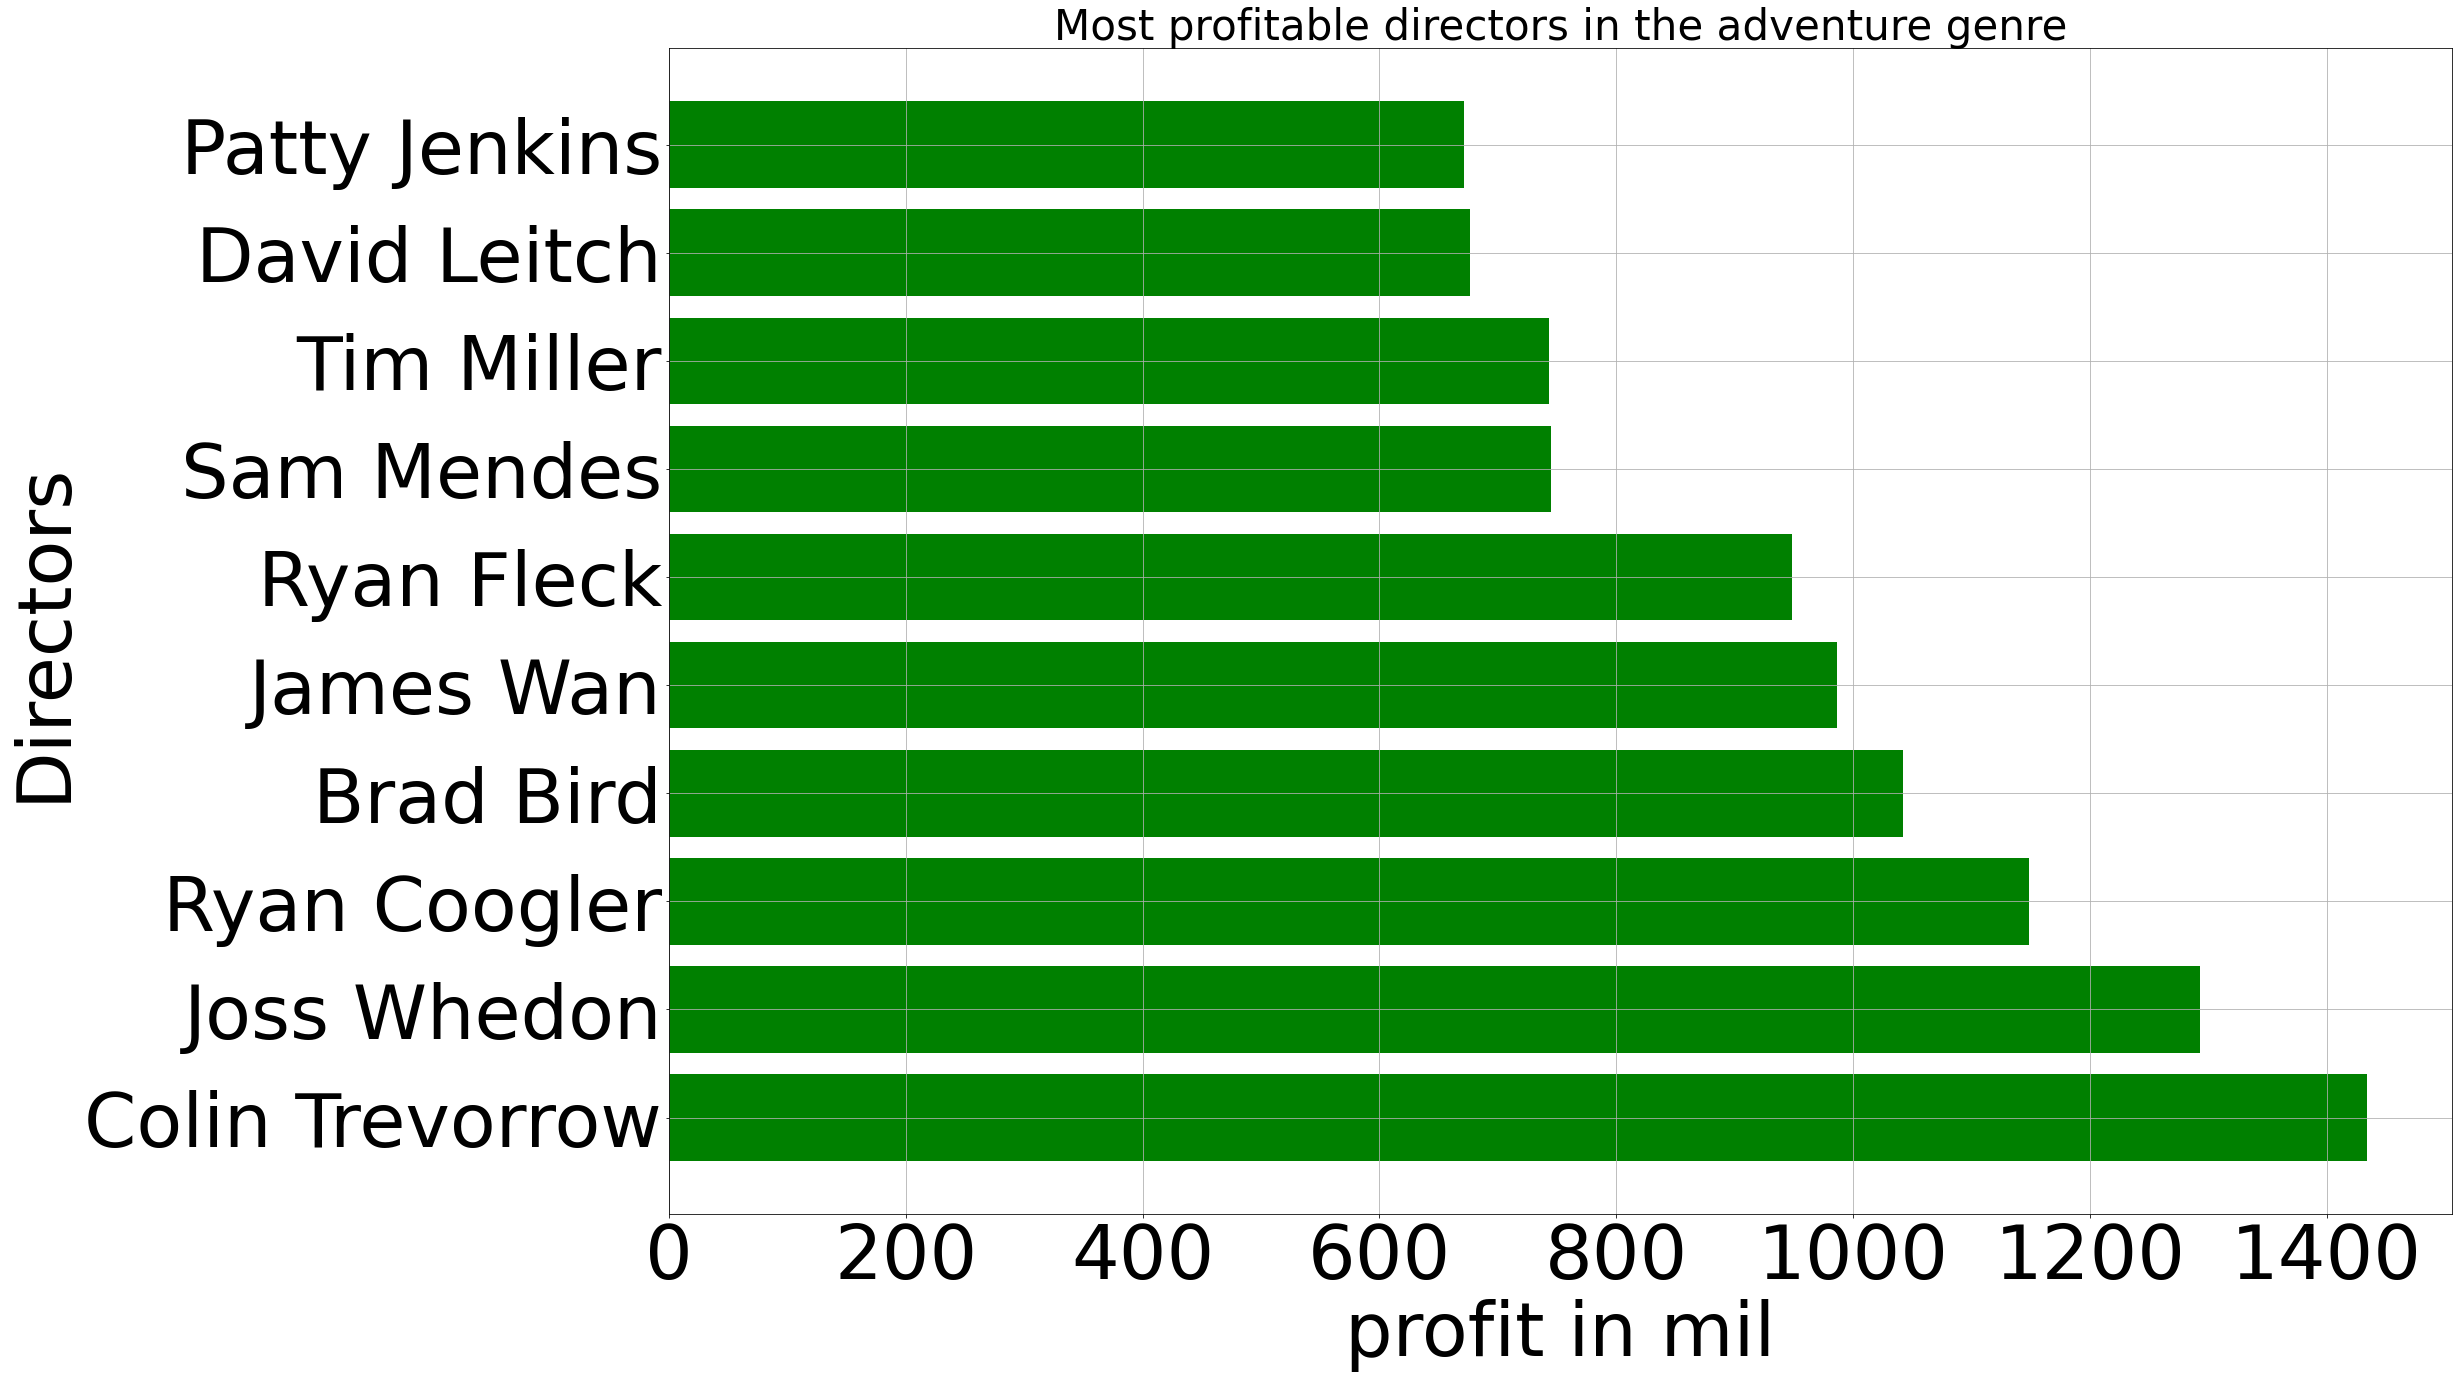

In [332]:
fig, ax = plt.subplots(figsize=(35, 20))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':35})
ax.barh(adventure_director_profit.keys(), adventure_director_profit, color = "green")
ax.set_xlabel('profit in mil')
ax.set_ylabel("Directors")
ax.set_title('Most profitable directors in the adventure genre')
#ax.set_xticklabels(director_movie_profit.keys(), rotation=45)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

<ipython-input-314-38b0588478b9>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(adventure_distributor_profit.keys(), adventure_distributor_profit, color = "rgbgymc")
<ipython-input-314-38b0588478b9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(adventure_distributor_profit.keys(), rotation=30)


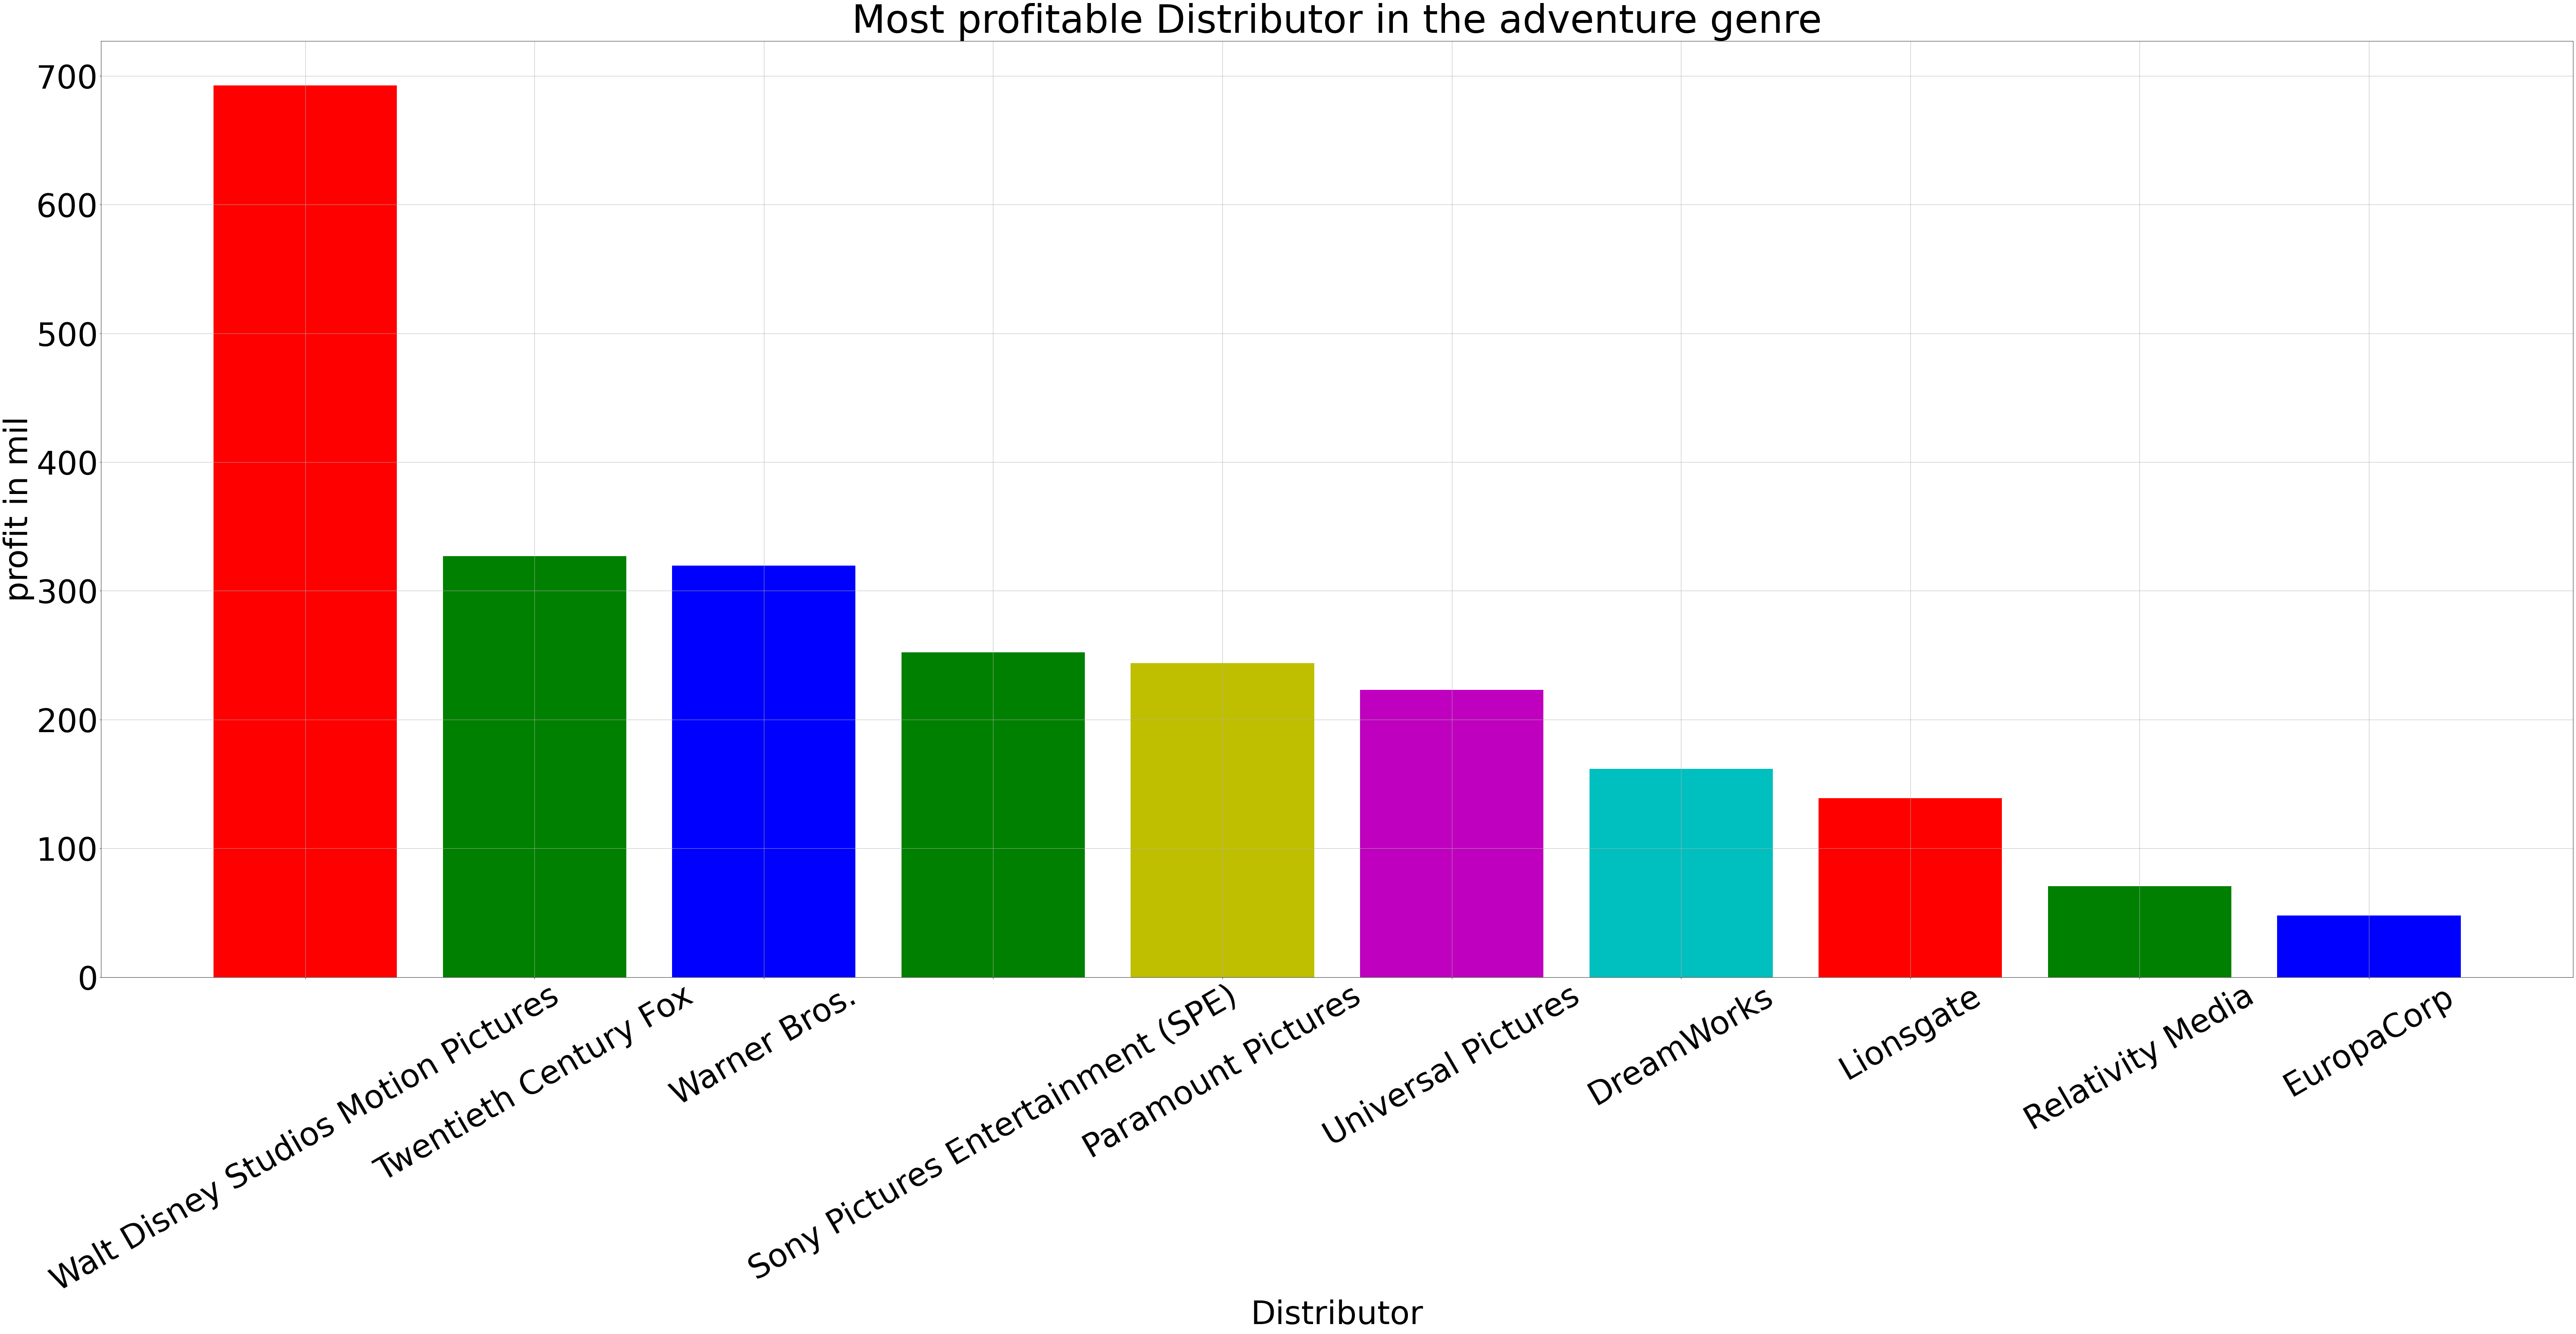

In [314]:
fig, ax = plt.subplots(figsize=(85, 45))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':75})
ax.bar(adventure_distributor_profit.keys(), adventure_distributor_profit, color = "rgbgymc")
ax.set_xlabel('Distributor')
ax.set_ylabel("profit in mil")
ax.set_title('Most profitable Distributor in the adventure genre')
ax.set_xticklabels(adventure_distributor_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

In [198]:
animation_df = df[df['genre2'] == 'Animation']
animation_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
5,46,2016,Finding Dory,200.0,486.295561,1021.215193,tt2277860,Finding Dory,97.0,Adventure,Animation,821.215193,4.106076,Andrew Stanton,Walt Disney Studios Motion Pictures,97.0
12,26,2016,The Secret Life of Pets,75.0,368.384330,886.750534,tt2709768,The Secret Life of Pets,87.0,Adventure,Animation,811.750534,10.823340,Yarrow Cheney,Universal Pictures,87.0
13,22,2013,Despicable Me 2,76.0,368.065385,975.216835,tt1690953,Despicable Me 2,98.0,Adventure,Animation,899.216835,11.831800,Pierre Coffin,Universal Pictures,98.0
17,57,2016,Zootopia,150.0,341.268248,1019.429616,tt2948356,Zootopia,108.0,Adventure,Animation,869.429616,5.796197,Rich Moore,Walt Disney Studios Motion Pictures,108.0
18,73,2015,Minions,74.0,336.045770,1160.336173,tt2293640,Minions,91.0,Adventure,Animation,1086.336173,14.680219,Pierre Coffin,Universal Pictures,91.0


In [240]:
animation_director_profit = animation_df.groupby(["director"])['profit'].mean().sort_values(ascending= False).head(10)
animation_distributor_profit = animation_df.groupby(["Distributor"])['profit'].mean().sort_values(ascending= False).head(10)

In [241]:
animation_director_profit

director
Pierre Coffin      981.760253
Rich Moore         869.429616
Andrew Stanton     821.215193
Yarrow Cheney      811.750534
Dan Scanlon        543.588329
Don Hall           487.517365
Tom McGrath        385.878762
Will Gluck         297.136477
Clay Kaytis        279.327887
Carlos Saldanha    270.847110
Name: profit, dtype: float64

In [242]:
animation_distributor_profit

Distributor
Universal Pictures                     758.076558
Walt Disney Studios Motion Pictures    457.009667
Twentieth Century Fox                  230.931035
Sony Pictures Entertainment (SPE)      191.867016
Warner Bros.                           159.234909
Open Road Films (II)                    92.529966
Relativity Media                        55.387072
Focus Features                          50.032956
Paramount Pictures                      21.838537
Lionsgate                               -9.343321
Name: profit, dtype: float64

ANIMATION DIRECTOR

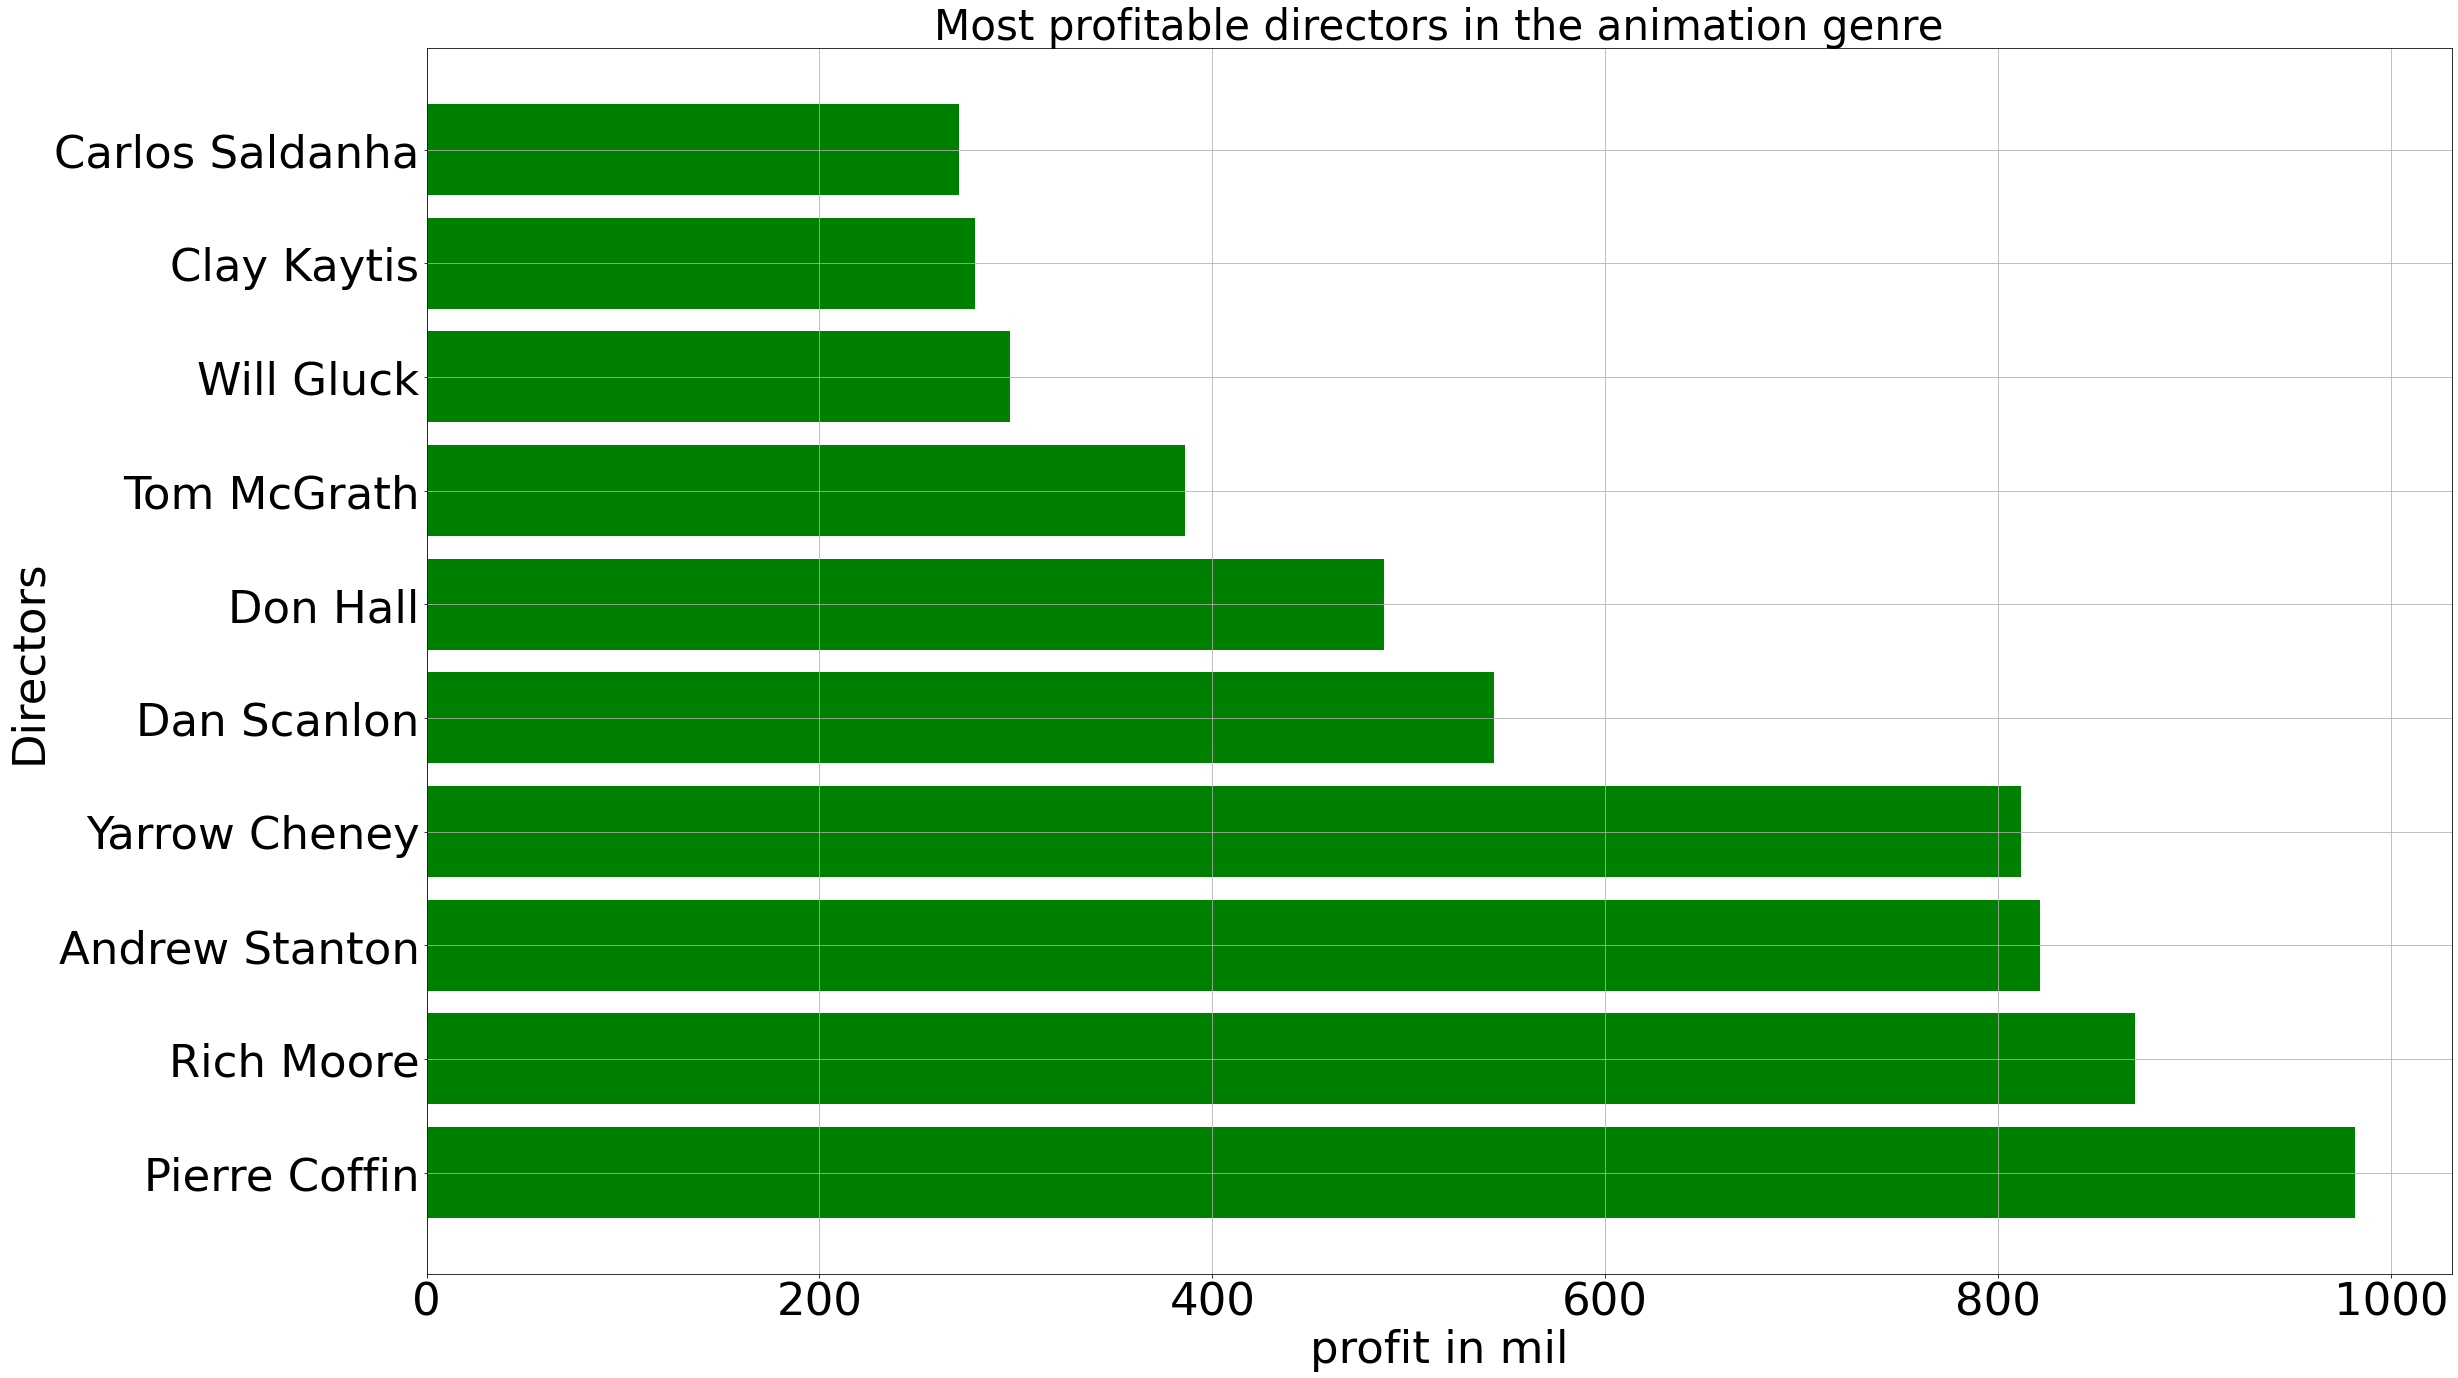

In [316]:
fig, ax = plt.subplots(figsize=(35, 20))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':35})
ax.barh(animation_director_profit.keys(), animation_director_profit, color = "green")
ax.set_xlabel('profit in mil')
ax.set_ylabel("Directors")
ax.set_title('Most profitable directors in the animation genre')
#ax.set_xticklabels(director_movie_profit.keys(), rotation=45)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

ANIMATION DISTRIBUTOR

<ipython-input-320-3424284f4870>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(animation_distributor_profit.keys(), animation_distributor_profit, color = "rgbgymc")
<ipython-input-320-3424284f4870>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(animation_distributor_profit.keys(), rotation=30)


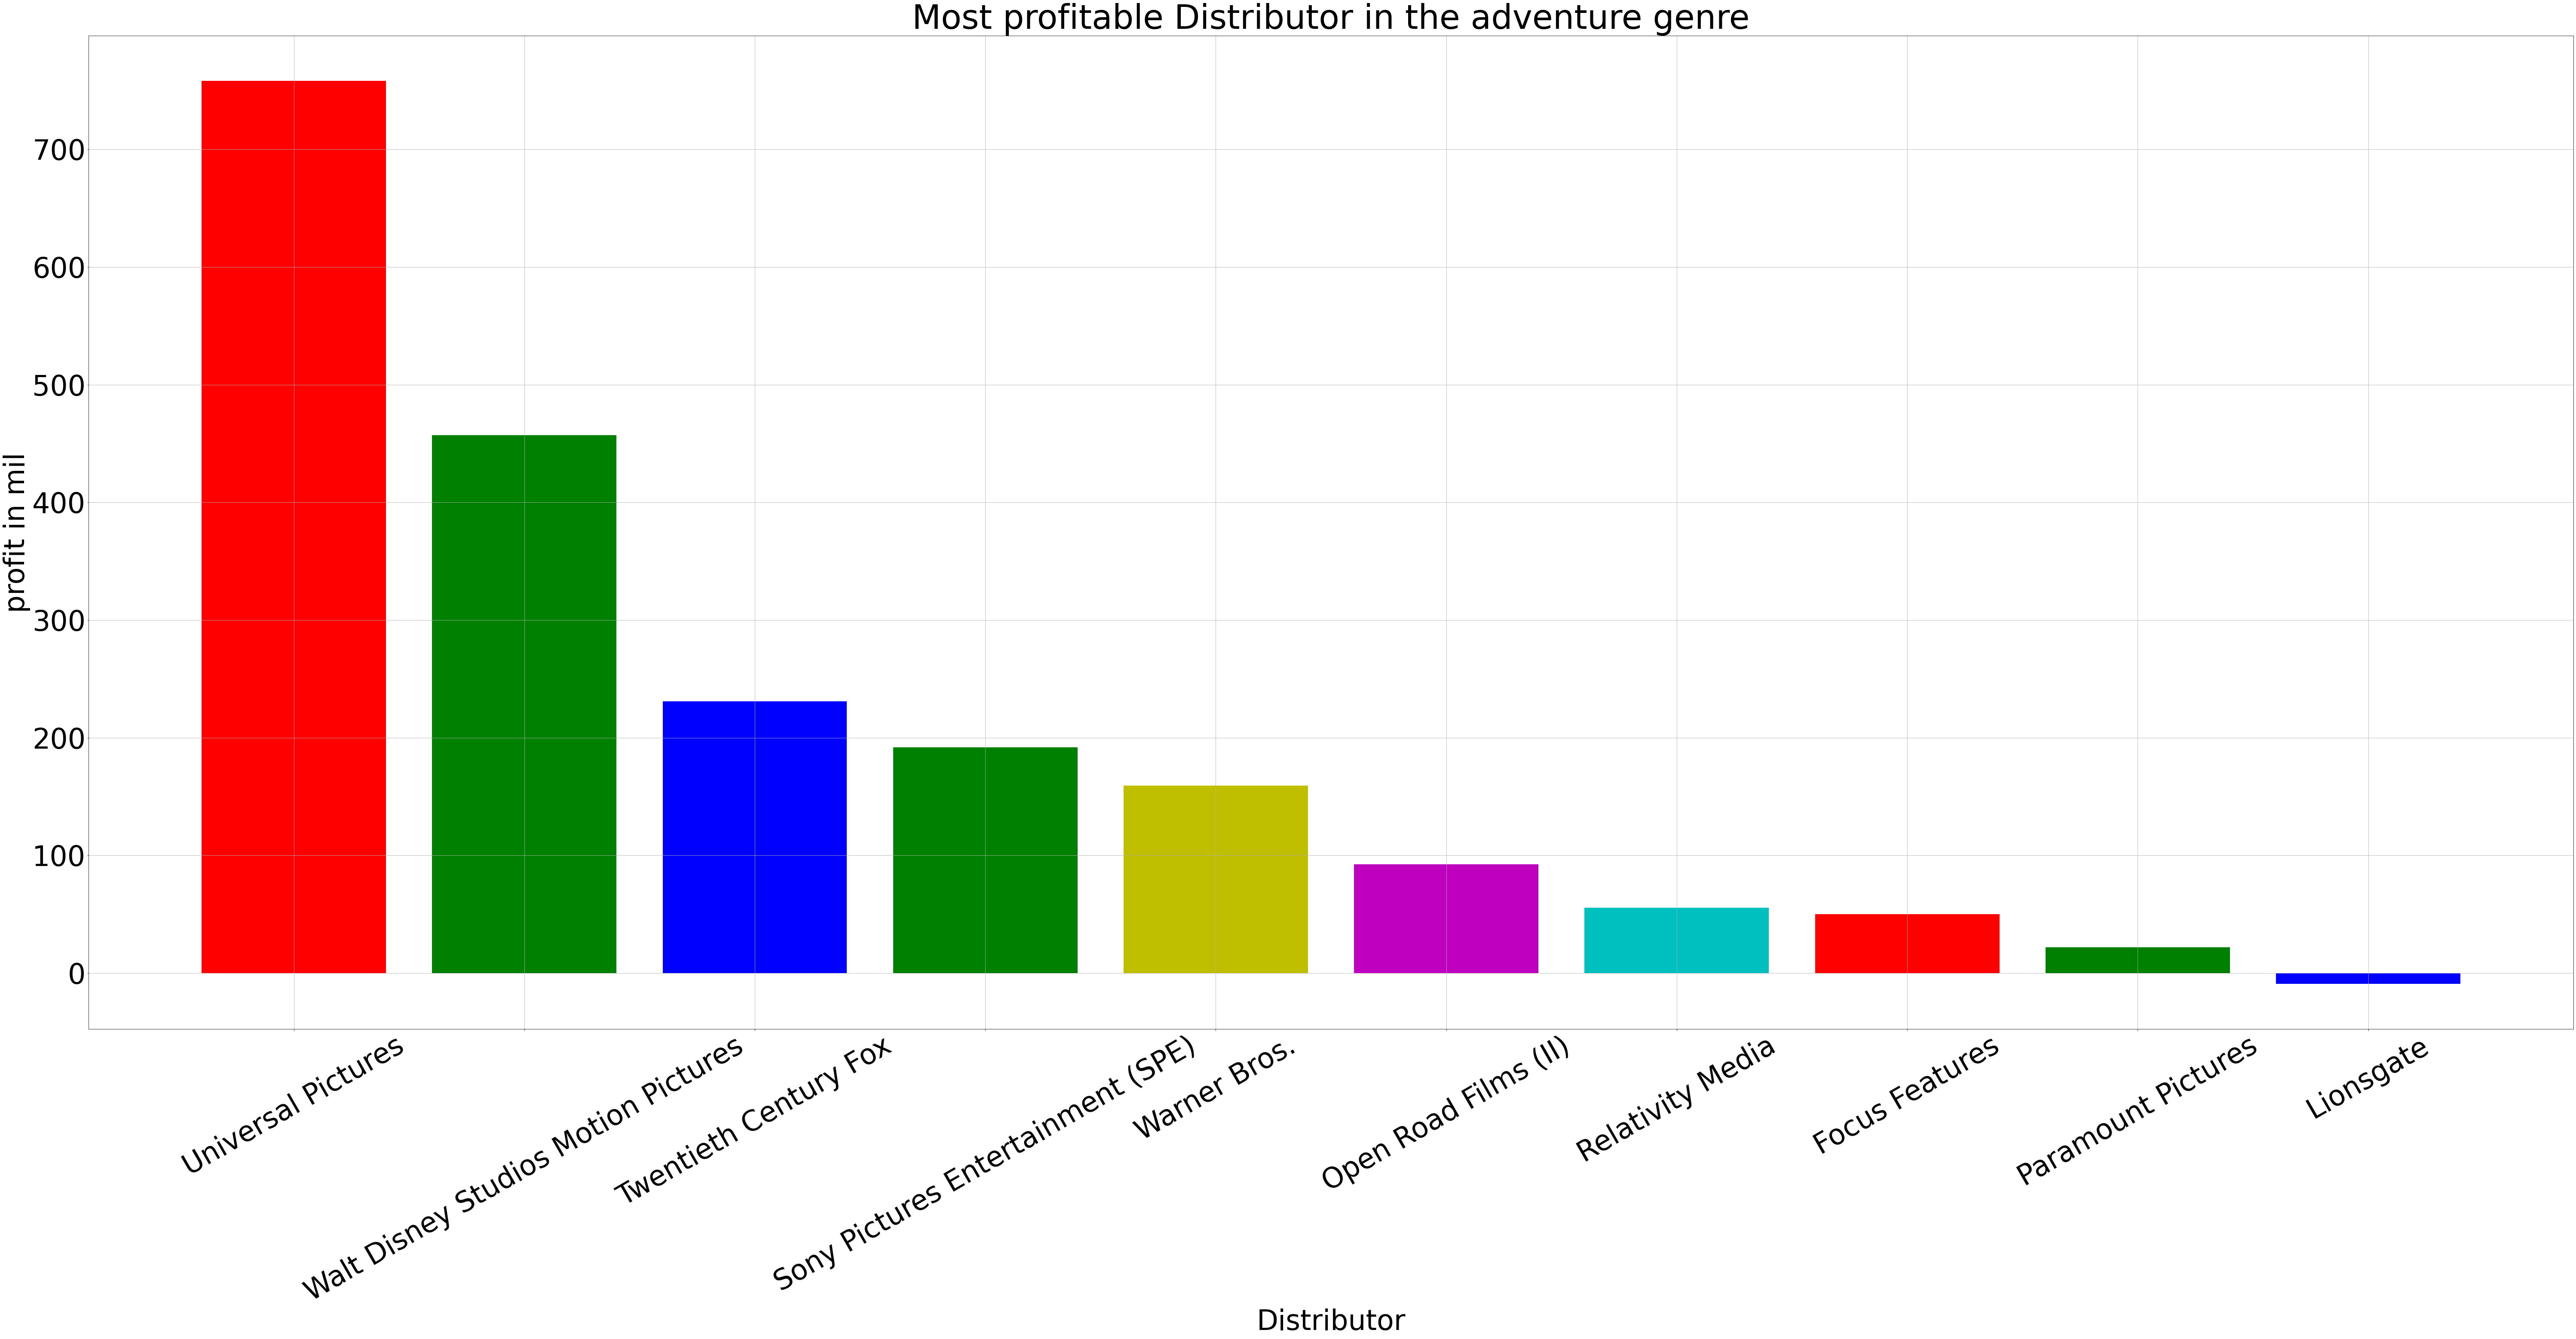

In [320]:
fig, ax = plt.subplots(figsize=(85,45))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':65})
ax.bar(animation_distributor_profit.keys(), animation_distributor_profit, color = "rgbgymc")
ax.set_xlabel('Distributor')
ax.set_ylabel("profit in mil")
ax.set_title('Most profitable Distributor in the adventure genre')
ax.set_xticklabels(animation_distributor_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

FAMILY

In [173]:
family_df = df[df['genre2'] == 'Family']
family_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
33,54,2013,Oz the Great and Powerful,200.0,234.770996,490.359051,tt1623205,Oz the Great and Powerful,130.0,Adventure,Family,290.359051,1.451795,Sam Raimi,Walt Disney Studios Motion Pictures,130.0
34,85,2016,Fantastic Beasts and Where to Find Them,180.0,234.037575,802.402853,tt3183660,Fantastic Beasts and Where to Find Them,132.0,Adventure,Family,622.402853,3.457794,David Yates,Warner Bros.,132.0
63,45,2018,Mary Poppins Returns,130.0,171.958438,341.528518,tt5028340,Mary Poppins Returns,130.0,Comedy,Family,211.528518,1.627142,Rob Marshall,Walt Disney Studios Motion Pictures,130.0
93,95,2017,Wonder,20.0,132.422809,304.604712,tt2543472,Wonder,113.0,Drama,Family,284.604712,14.230236,Stephen Chbosky,Lionsgate,113.0
116,22,2019,Dumbo,170.0,113.883318,345.004422,tt3861390,Dumbo,112.0,Adventure,Family,175.004422,1.029438,Tim Burton,Walt Disney Studios Motion Pictures,112.0


In [261]:
family_director_profit = family_df.groupby(["director"])['profit'].mean().sort_values(ascending= False).head(10)
family_distributor_profit = family_df.groupby(["Distributor"])['profit'].mean().sort_values(ascending= False).head(10)

In [262]:
family_director_profit

director
David Yates         622.402853
Sam Raimi           290.359051
Stephen Chbosky     284.604712
Rob Marshall        211.528518
Tim Burton          175.004422
James Bobin         106.928112
Andy Fickman         95.832383
Joshua Samson        60.838736
Steven Spielberg     59.646680
Narayanan Kartha     40.282881
Name: profit, dtype: float64

In [ ]:
FAMILY DIRECTOR

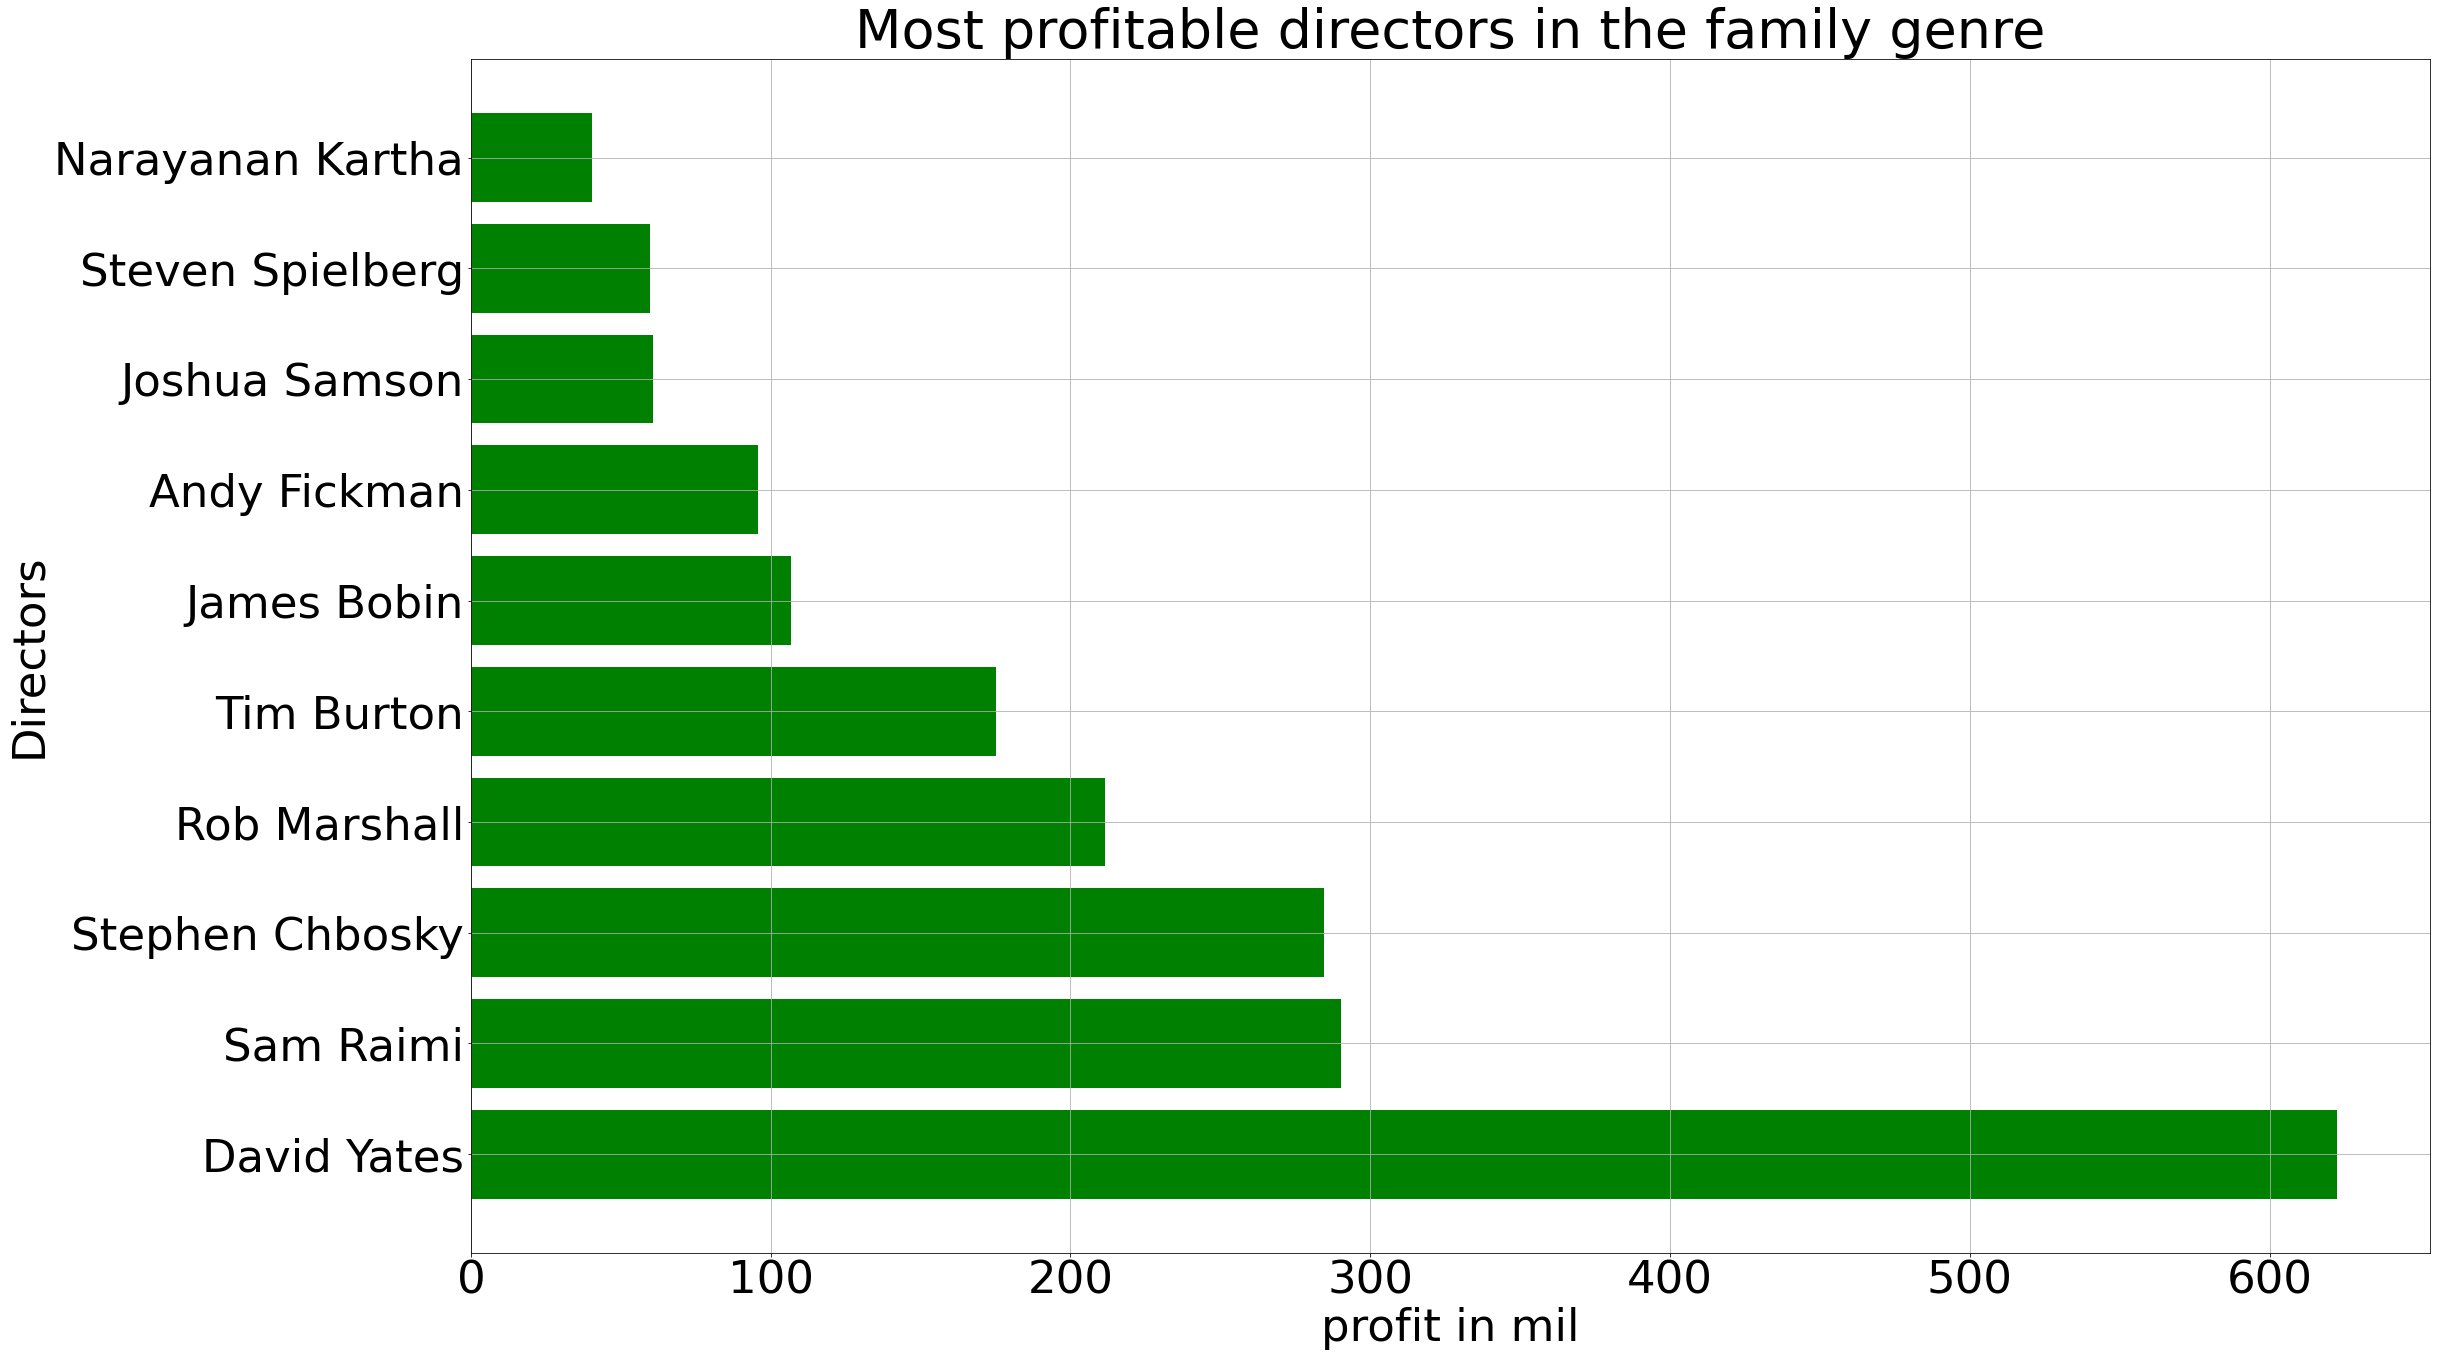

In [322]:
fig, ax = plt.subplots(figsize=(35, 20))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':45})
ax.barh(family_director_profit.keys(), family_director_profit, color = "green")
ax.set_xlabel('profit in mil')
ax.set_ylabel("Directors")
ax.set_title('Most profitable directors in the family genre')
#ax.set_xticklabels(director_movie_profit.keys(), rotation=45)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

<ipython-input-324-8ef5d883b255>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(family_distributor_profit.keys(), family_distributor_profit, color = "rgbgymc")
<ipython-input-324-8ef5d883b255>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(family_distributor_profit.keys(), rotation=30)


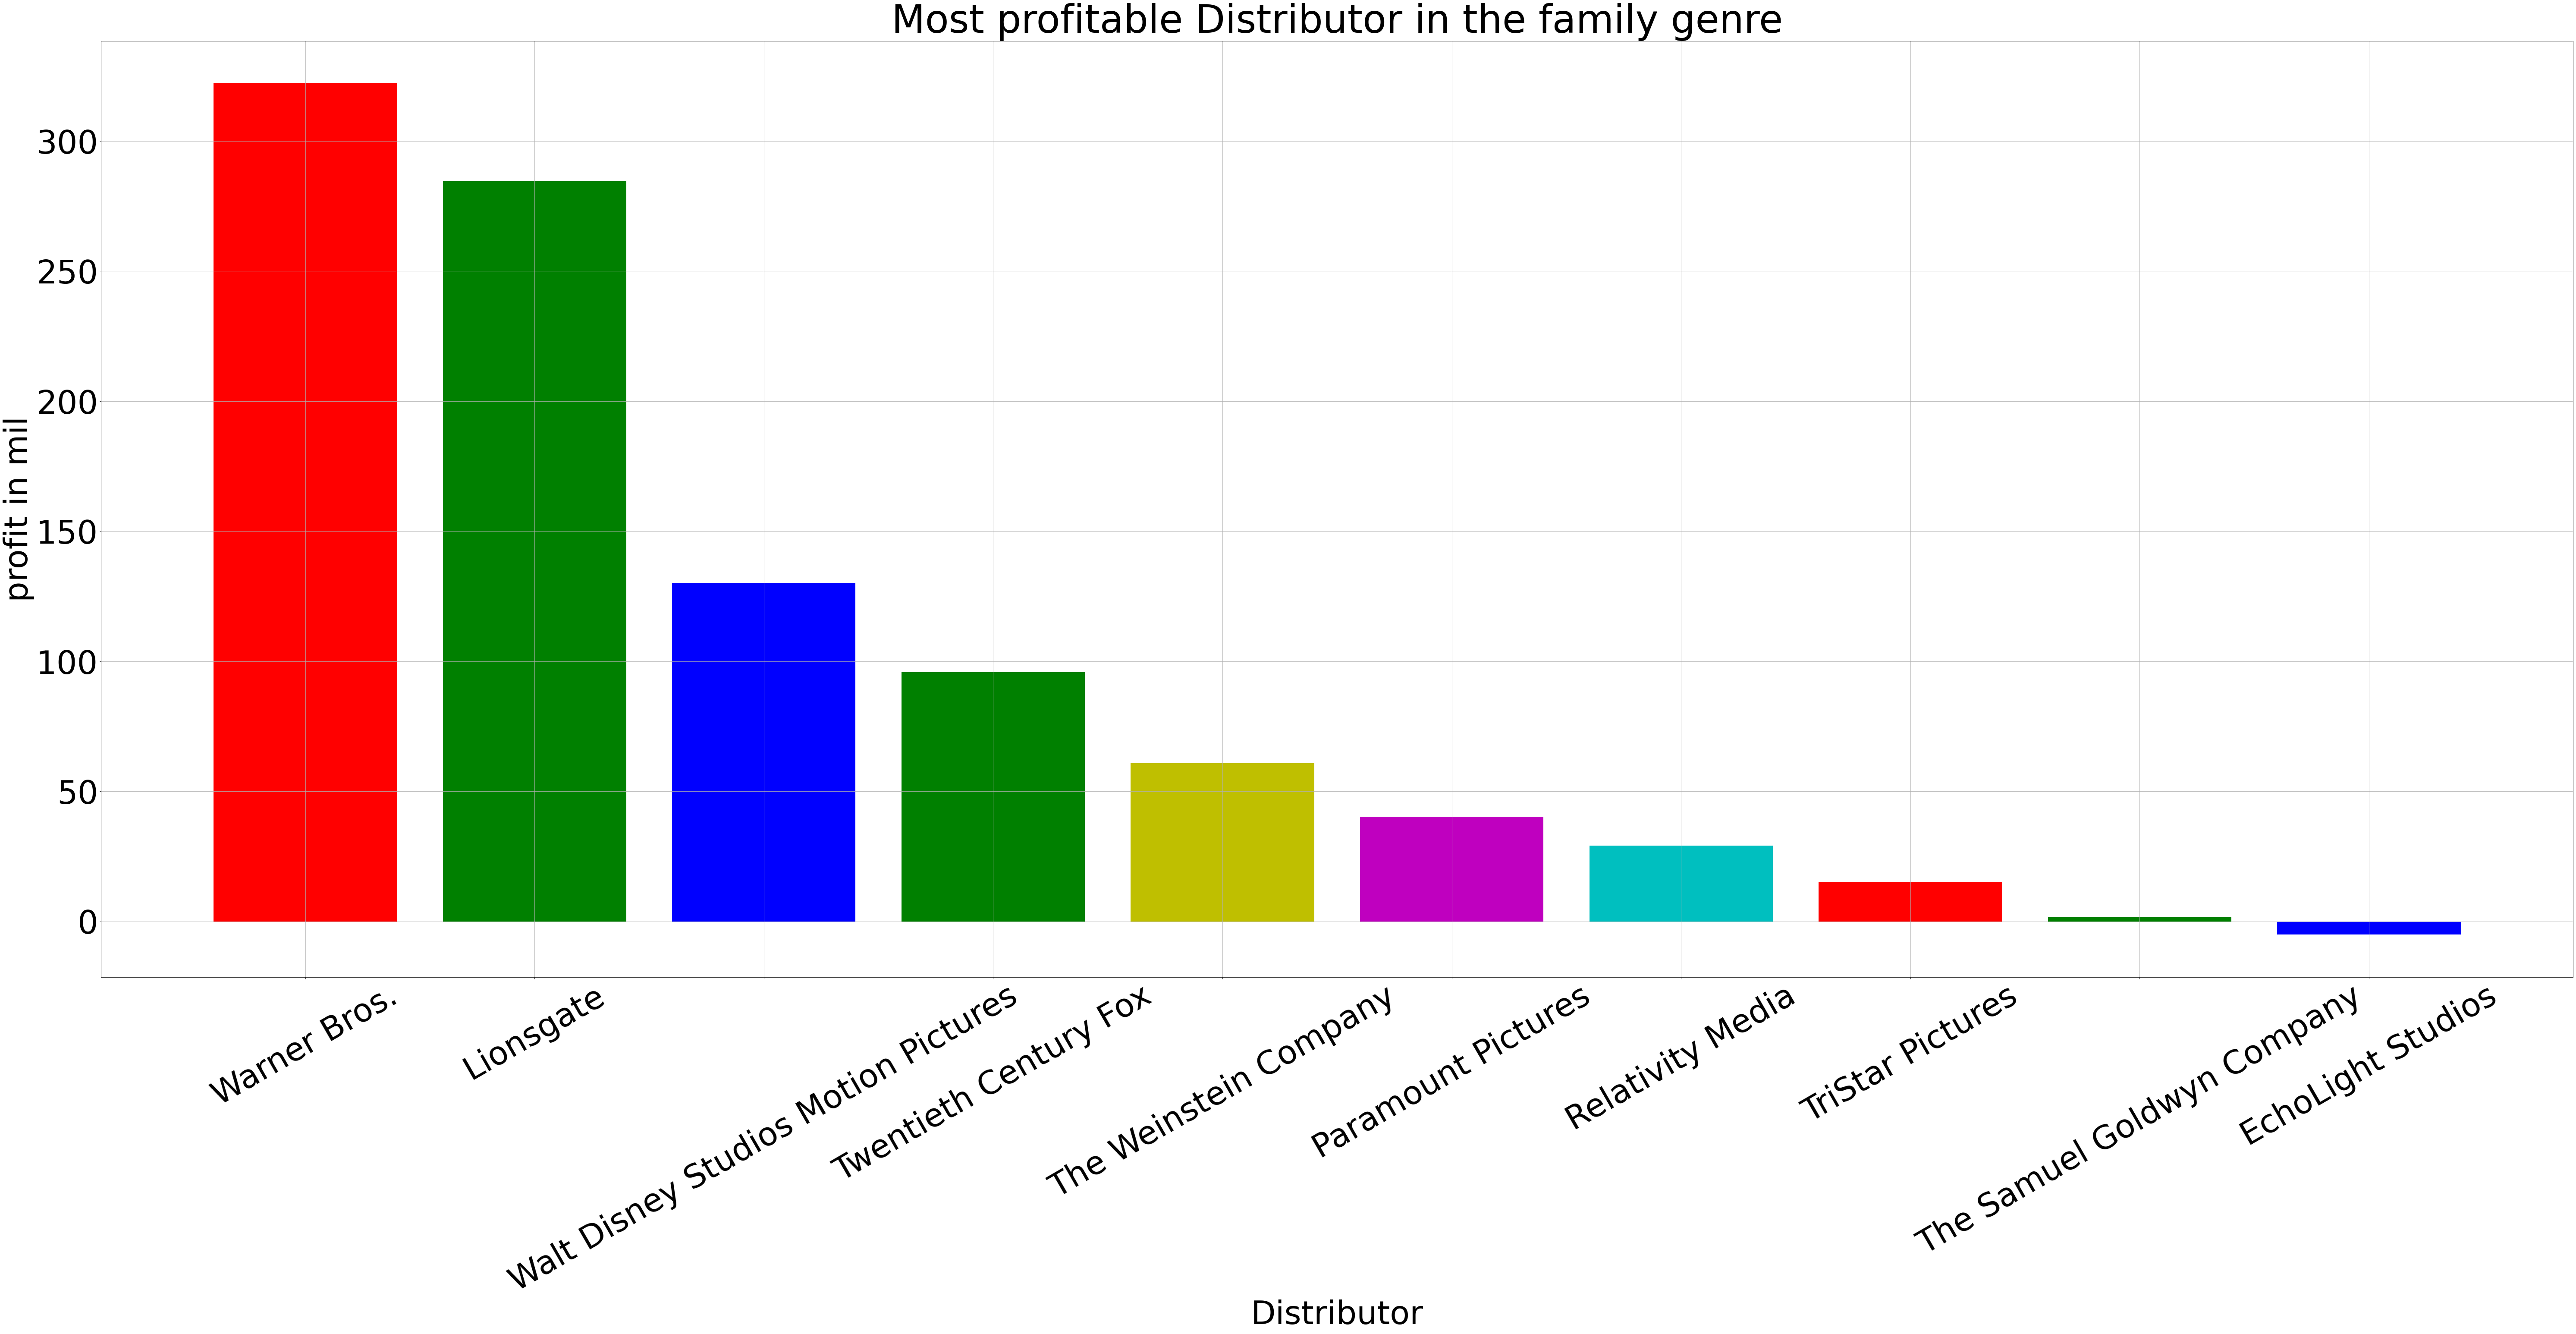

In [324]:
fig, ax = plt.subplots(figsize=(85, 45))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':75})
ax.bar(family_distributor_profit.keys(), family_distributor_profit, color = "rgbgymc")
ax.set_xlabel('Distributor')
ax.set_ylabel("profit in mil")
ax.set_title('Most profitable Distributor in the family genre')
ax.set_xticklabels(family_distributor_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

SCI FI

In [269]:
scifi_df = df[df['genre2'] == 'Sci-Fi']
adventure_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
0,42,2018,Black Panther,200.0,700.059566,1348.258224,tt1825683,Black Panther,134.0,Action,Adventure,1148.258224,5.741291,Ryan Coogler,Walt Disney Studios Motion Pictures,134.0
1,34,2015,Jurassic World,215.0,652.270625,1648.854864,tt0369610,Jurassic World,124.0,Action,Adventure,1433.854864,6.669092,Colin Trevorrow,Universal Pictures,124.0
2,27,2012,The Avengers,225.0,623.279547,1517.935897,tt0848228,The Avengers,143.0,Action,Adventure,1292.935897,5.746382,Joss Whedon,Walt Disney Studios Motion Pictures,143.0
3,44,2018,Incredibles 2,200.0,608.581744,1242.520711,tt3606756,Incredibles 2,118.0,Action,Adventure,1042.520711,5.212604,Brad Bird,Walt Disney Studios Motion Pictures,118.0
7,96,2019,Captain Marvel,175.0,426.525952,1123.061550,tt4154664,Captain Marvel,123.0,Action,Adventure,948.061550,5.417495,Ryan Fleck,Walt Disney Studios Motion Pictures,123.0


In [270]:
scifi_df_director_profit = scifi_df.groupby(["director"])['profit'].mean().sort_values(ascending= False).head(10)
scifi_df_distributor_profit = scifi_df.groupby(["Distributor"])['profit'].mean().sort_values(ascending= False).head(10)

In [271]:
scifi_df_director_profit

director
Alfonso Cuarón     583.698673
Doug Liman         192.541256
Dean Devlin        120.796009
Josh Trank         111.681790
Scott Stewart       24.204111
James Mather        13.943049
Leigh Whannell      13.553285
Alexander Payne    -13.537029
Dan Bradley        -16.835850
Name: profit, dtype: float64

In [272]:
scifi_df_distributor_profit

Distributor
Warner Bros.             299.011979
Twentieth Century Fox    111.681790
BH Tilt                   13.553285
FilmDistrict              -1.446401
Paramount Pictures       -13.537029
Name: profit, dtype: float64

SCIFI DIRECTORS

<ipython-input-325-39f6b623b020>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scifi_df_director_profit.keys(), rotation=30)


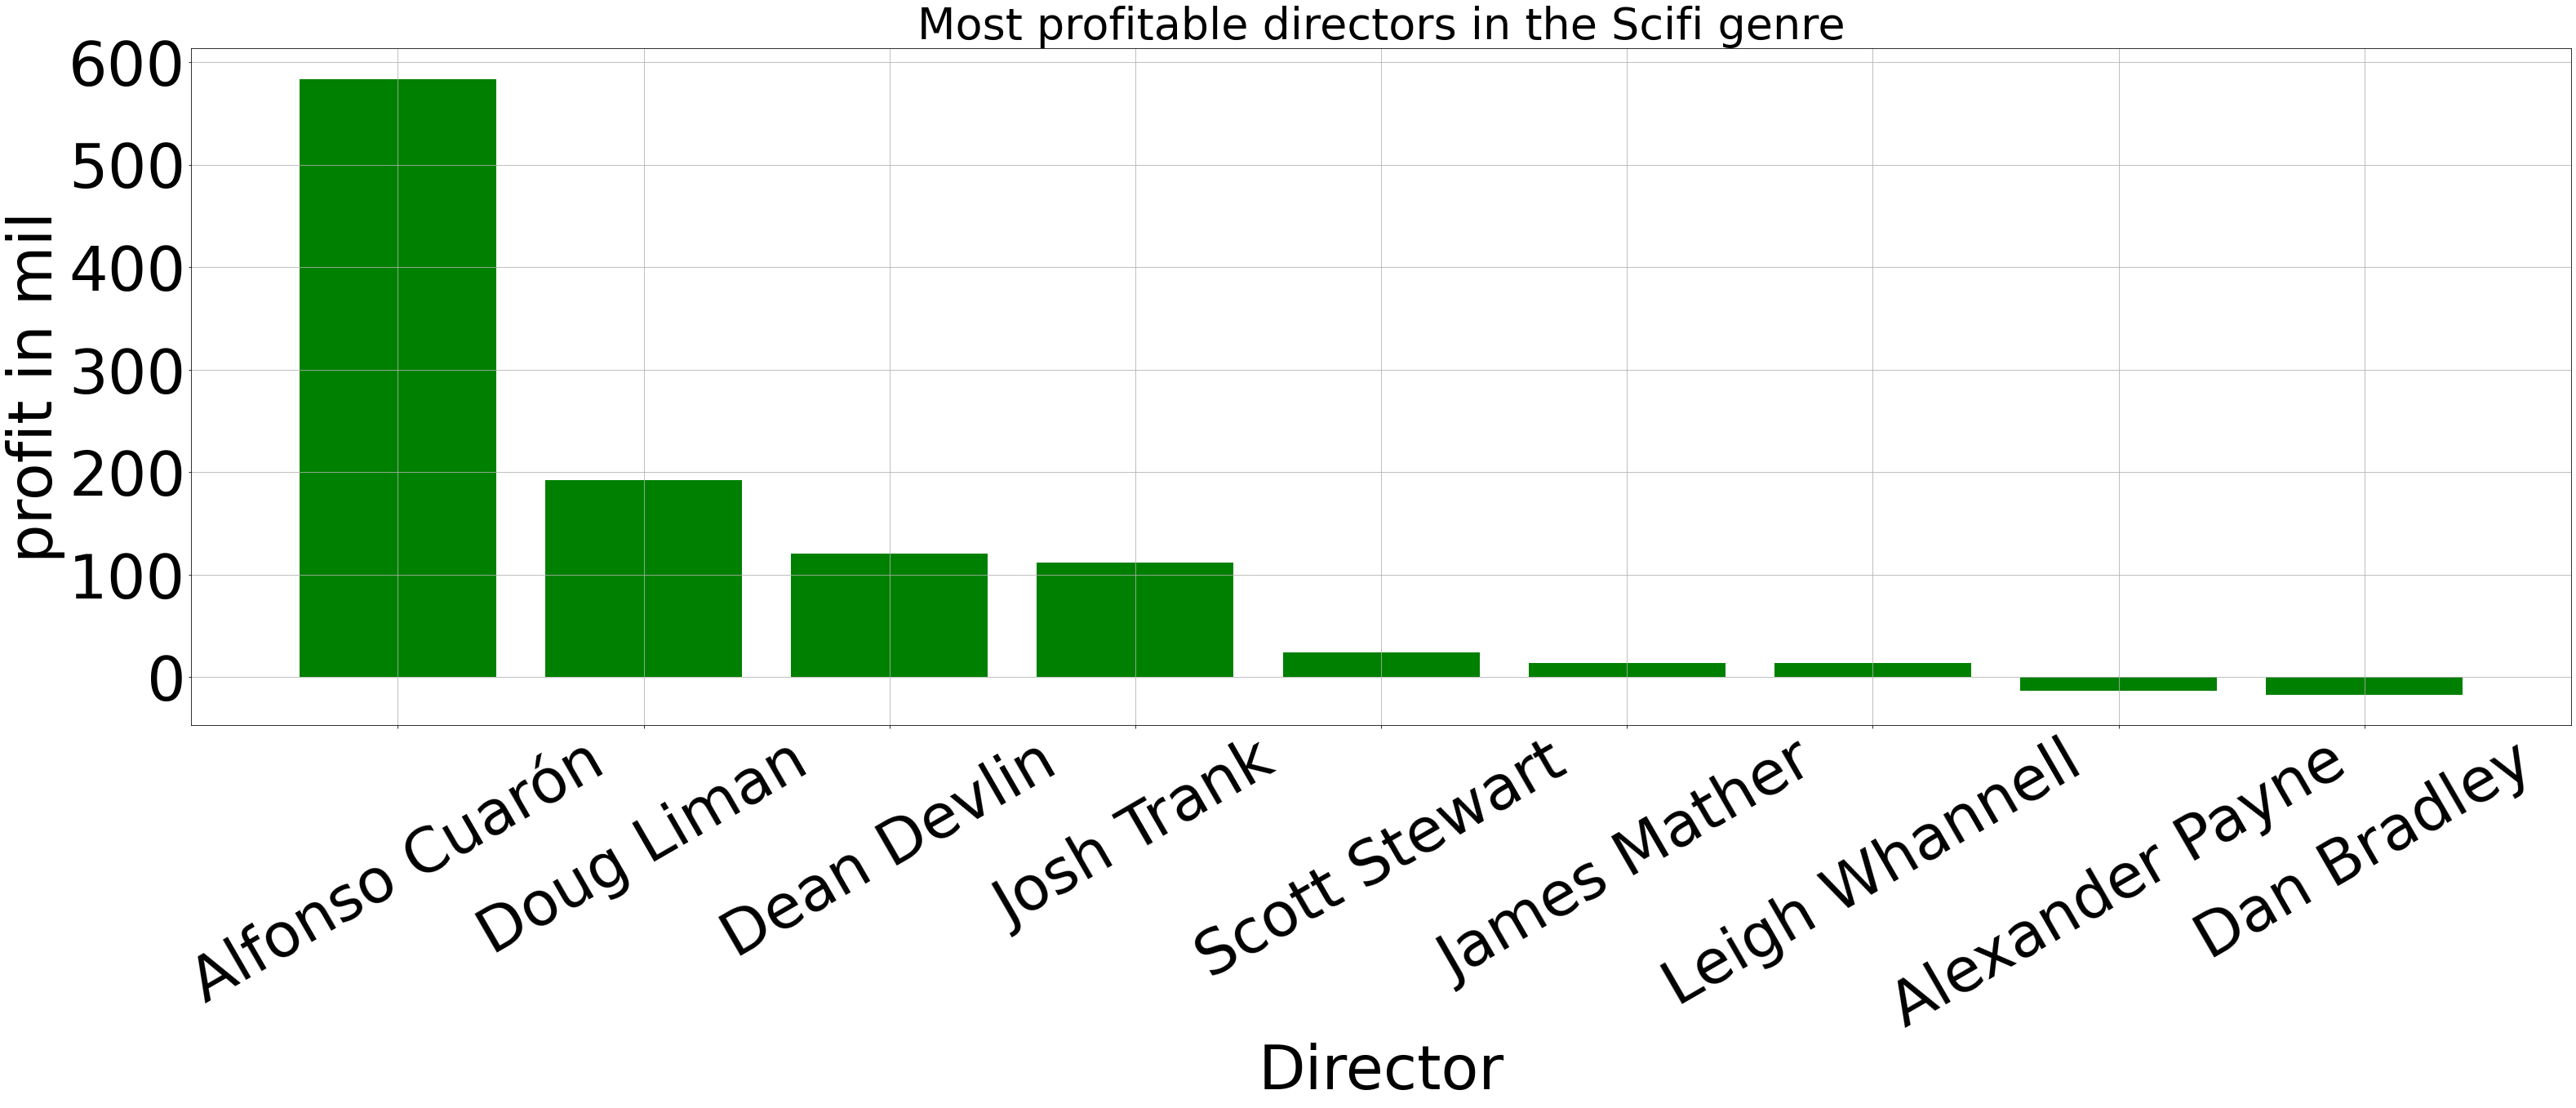

In [325]:
fig, ax = plt.subplots(figsize=(45, 20))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':45})
ax.bar(scifi_df_director_profit.keys(), scifi_df_director_profit, color = "green")
ax.set_xlabel('Director')
ax.set_ylabel("profit in mil")
ax.set_title('Most profitable directors in the Scifi genre')
ax.set_xticklabels(scifi_df_director_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

SCIFI DISTRIBUTORS

<ipython-input-326-caff8c621971>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.barh(scifi_df_distributor_profit.keys(), scifi_df_distributor_profit, color = "rgbgymc")


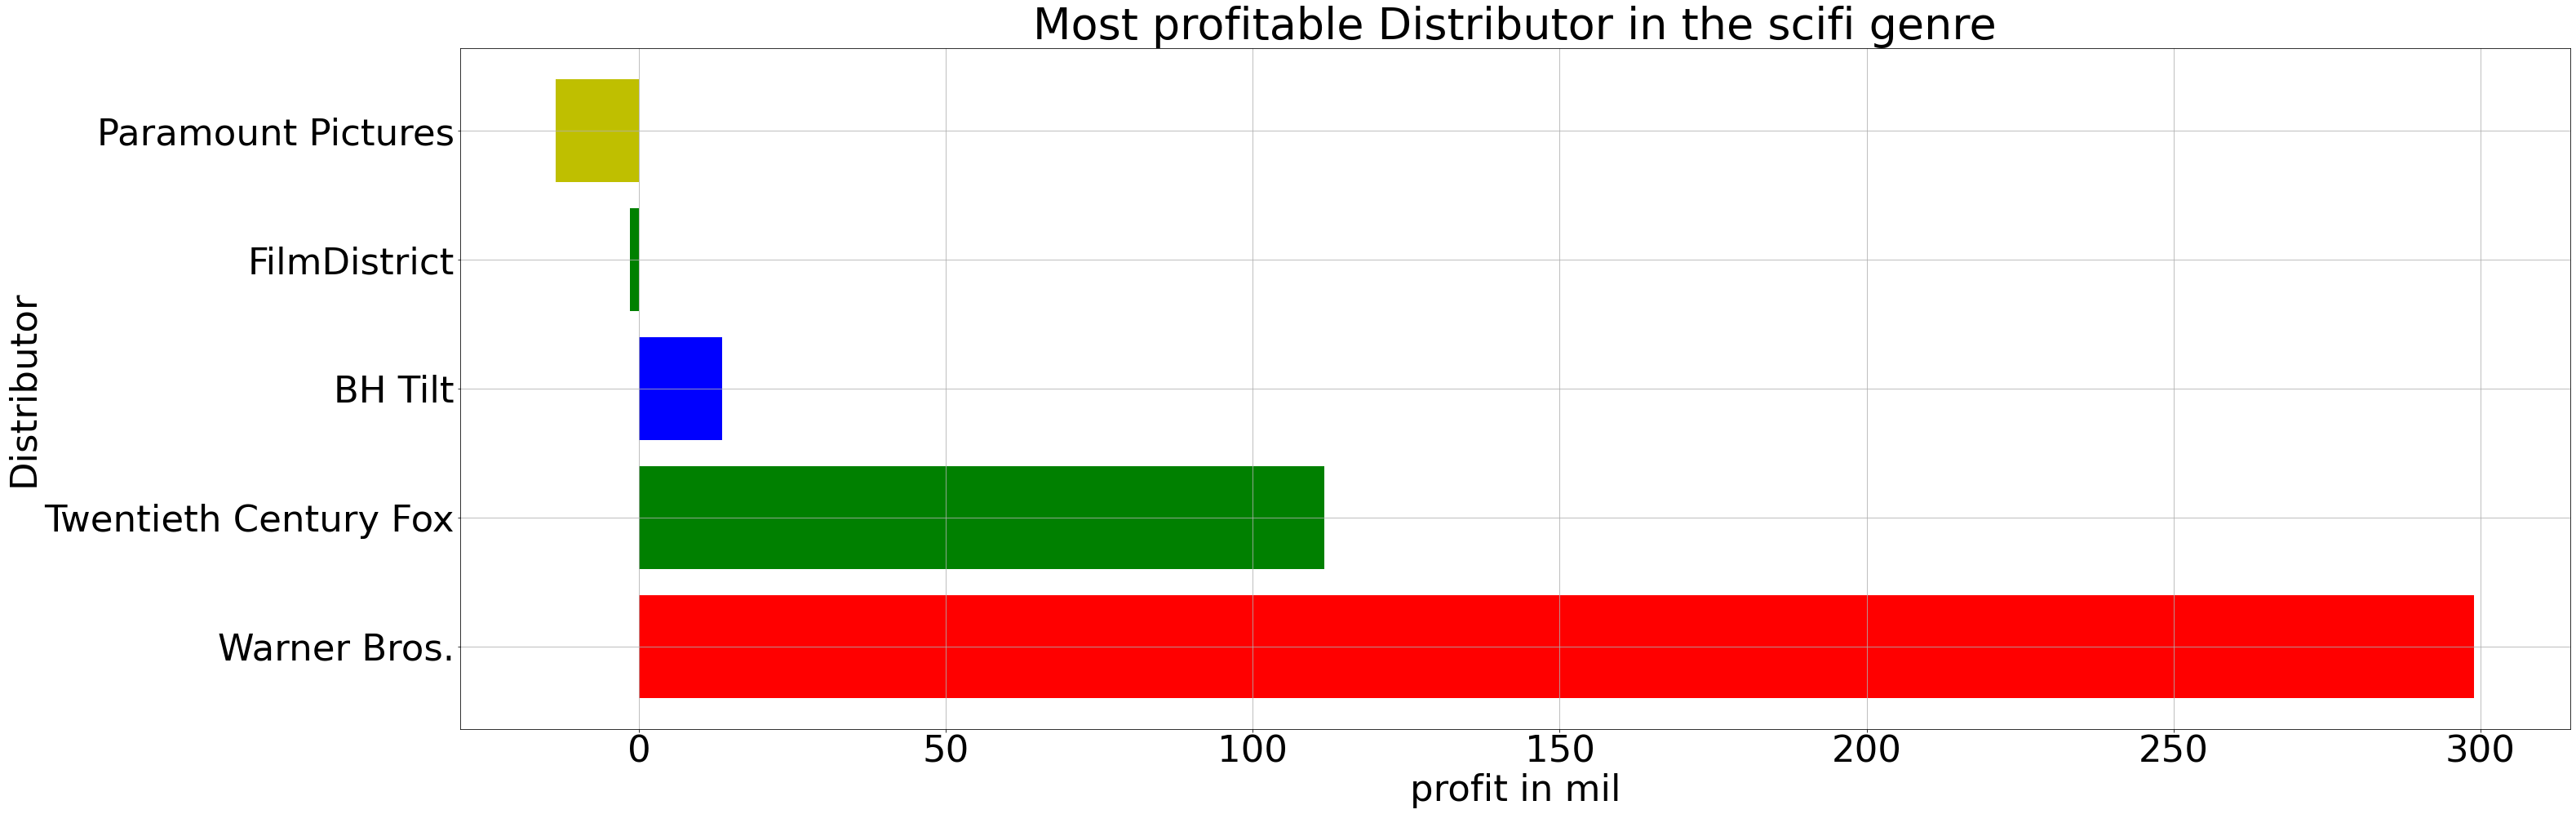

In [326]:
fig, ax = plt.subplots(figsize=(45, 15))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':45})
ax.barh(scifi_df_distributor_profit.keys(), scifi_df_distributor_profit, color = "rgbgymc")
ax.set_xlabel('profit in mil')
ax.set_ylabel("Distributor")
ax.set_title('Most profitable Distributor in the scifi genre')
#ax.set_xticklabels(scifi_df_distributor_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

In [ ]:
Fantasy

In [290]:
fantasy_df = df[df['genre2'] == 'Fantasy']
fantasy_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes_x,genre1,genre2,profit,profit_to_budget,director,Distributor,runtime_minutes_y
4,35,2017,Beauty and the Beast,160.0,504.014165,1259.199706,tt9173998,Beauty and the Beast,60.0,Family,Fantasy,1099.199706,6.869998,Marilyn Barnes,Walt Disney Studios Motion Pictures,60.0
42,84,2012,Ted,50.0,218.665740,556.016627,tt1637725,Ted,106.0,Comedy,Fantasy,506.016627,10.120333,Seth MacFarlane,Universal Pictures,106.0
179,89,2012,Dark Shadows,150.0,79.727149,238.202668,tt1077368,Dark Shadows,113.0,Comedy,Fantasy,88.202668,0.588018,Tim Burton,Warner Bros.,113.0
211,66,2013,Jack the Giant Slayer,195.0,65.187603,197.687603,tt1351685,Jack the Giant Slayer,114.0,Adventure,Fantasy,2.687603,0.013783,Bryan Singer,Warner Bros.,114.0
253,21,2019,What Men Want,20.0,54.611903,69.911903,tt7634968,What Men Want,117.0,Comedy,Fantasy,49.911903,2.495595,Adam Shankman,Paramount Pictures,117.0


In [291]:
fantasy_director_profit = fantasy_df.groupby(["director"])['profit'].mean().sort_values(ascending= False).head(10)
fantasy_distributor_profit = fantasy_df.groupby(["Distributor"])['profit'].mean().sort_values(ascending= False).head(10)

In [292]:
fantasy_director_profit

director
Marilyn Barnes        1099.199706
Seth MacFarlane        506.016627
James Watkins          113.955898
Tim Burton              88.202668
R.J. Cutler             67.356170
Adam Shankman           49.911903
Michael Dougherty       46.788393
Lee Toland Krieger      38.984536
Michael Tiddes          37.314709
Jessie Nelson           24.227490
Name: profit, dtype: float64

In [293]:
fantasy_distributor_profit

Distributor
Walt Disney Studios Motion Pictures    1099.199706
Universal Pictures                      190.923958
CBS Films                               113.955898
Paramount Pictures                       49.911903
Warner Bros.                             42.132329
Lionsgate                                31.606013
Open Road Films (II)                     29.525034
STX Entertainment                        23.787727
Annapurna Pictures                       15.085560
Broad Green Pictures                     11.477345
Name: profit, dtype: float64

In [ ]:
FANTASY DIRECTOR

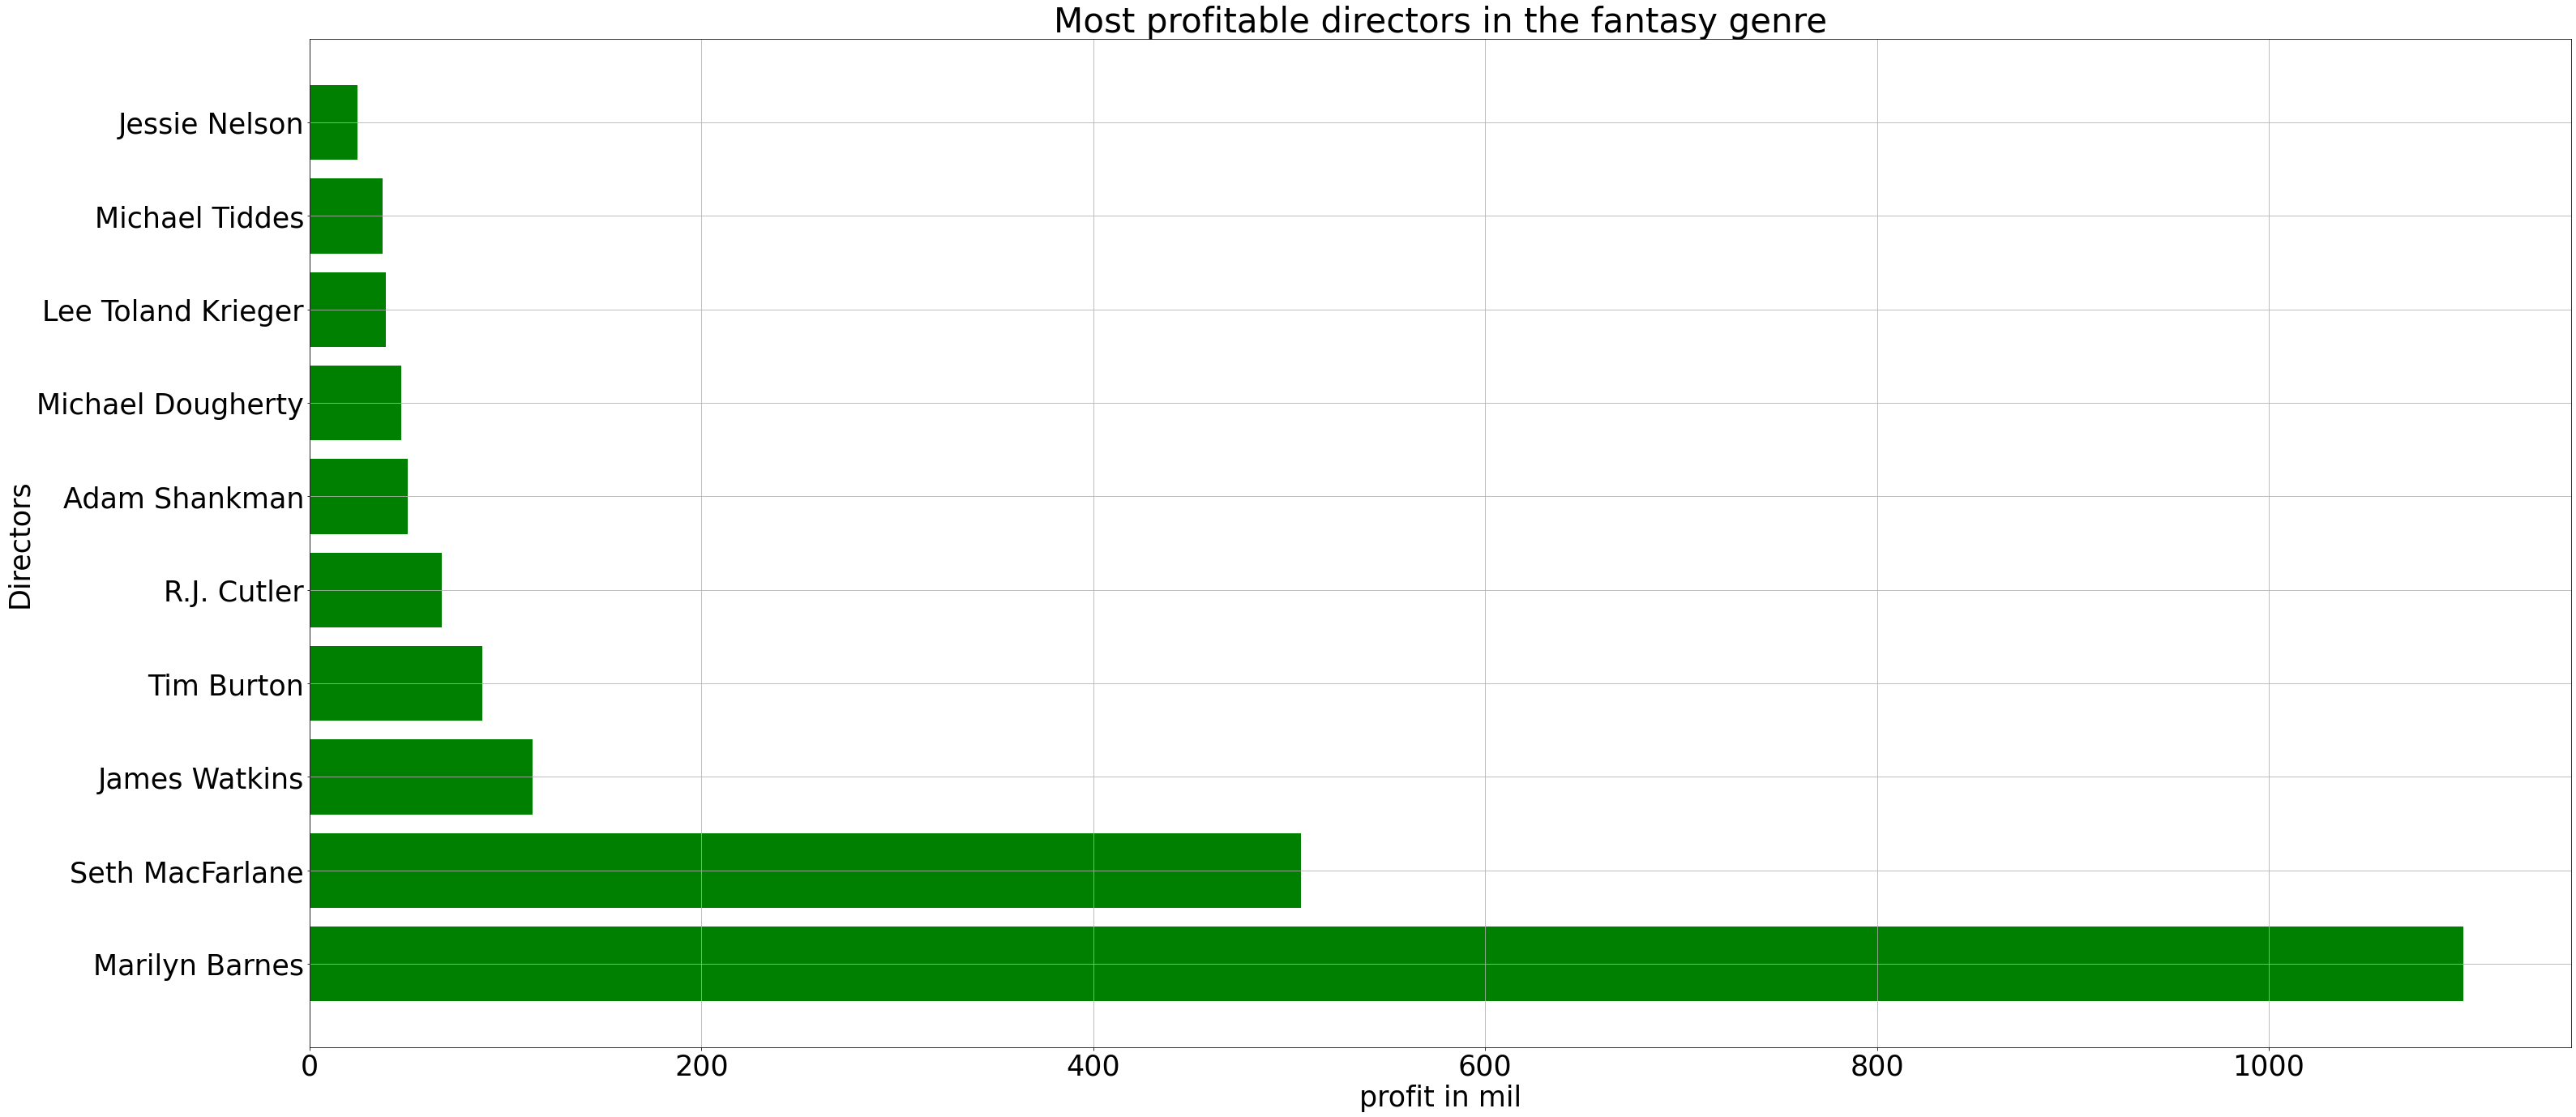

In [300]:
fig, ax = plt.subplots(figsize=(45, 20))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':35})
ax.barh(fantasy_director_profit.keys(), fantasy_director_profit, color = "green")
ax.set_xlabel('profit in mil')
ax.set_ylabel("Directors")
ax.set_title('Most profitable directors in the fantasy genre')
#ax.set_xticklabels(fantasy_director_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();

<ipython-input-328-43c890cae447>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(fantasy_distributor_profit.keys(), fantasy_distributor_profit, color = "rgbgymc")
<ipython-input-328-43c890cae447>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fantasy_distributor_profit.keys(), rotation=30)


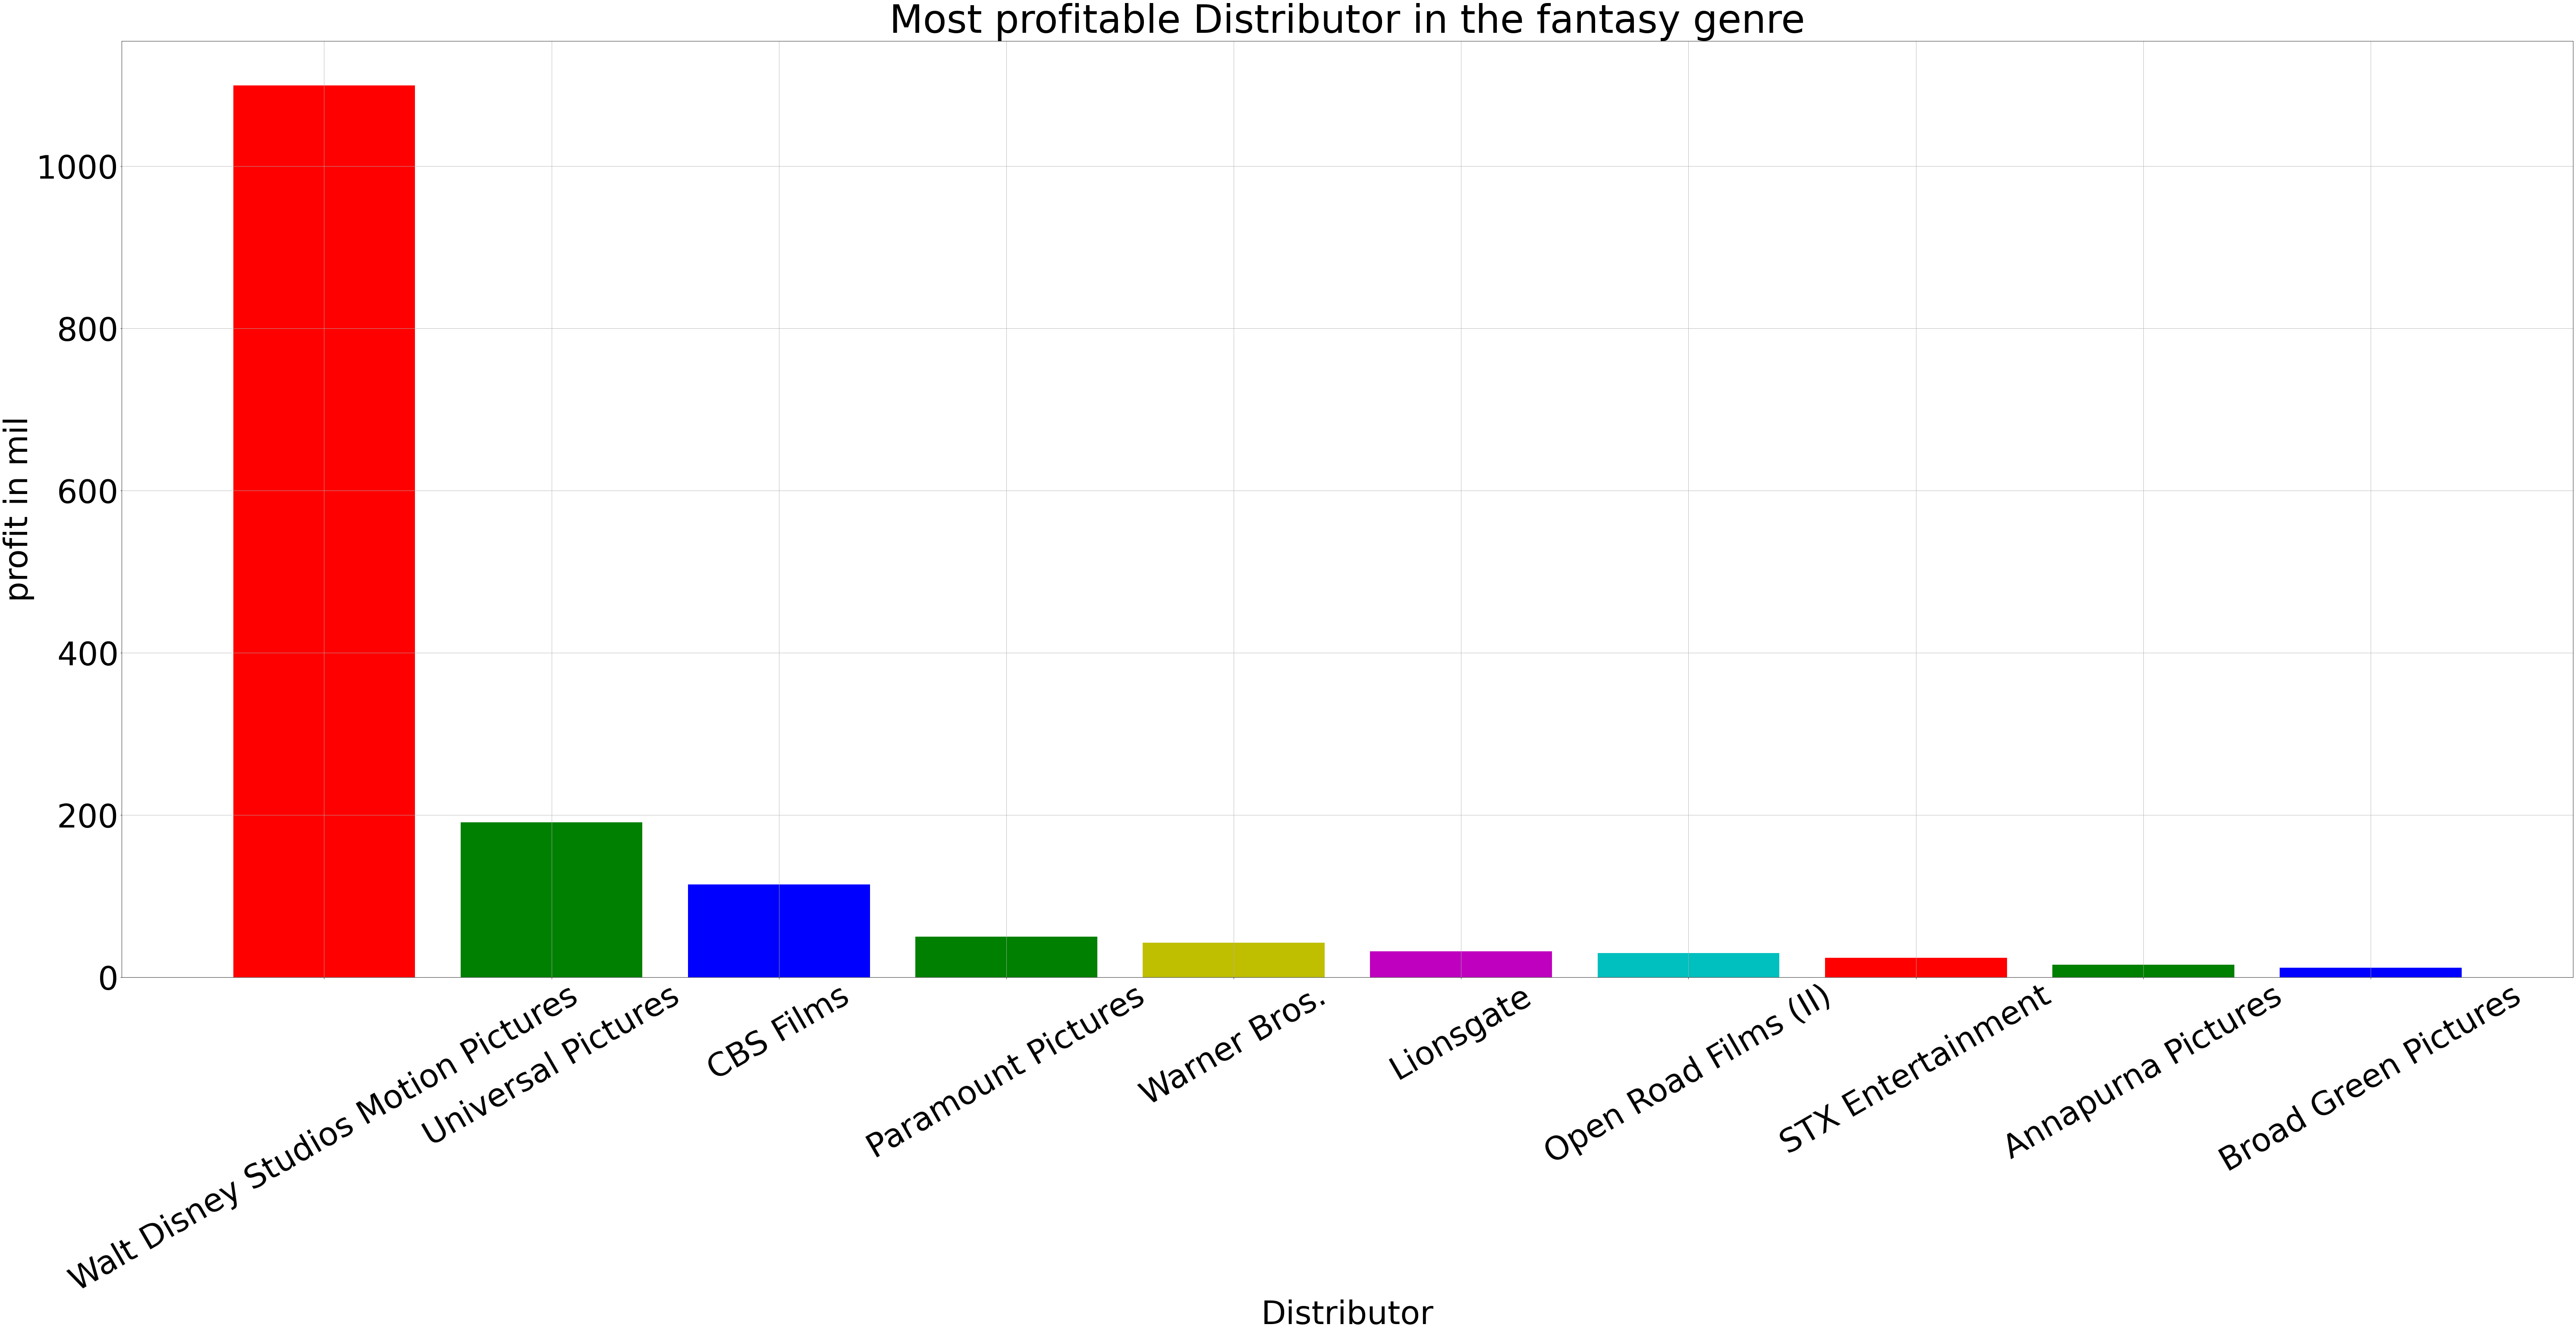

In [328]:
fig, ax = plt.subplots(figsize=(85, 45))
#plt.rcdefaults()
# sets up bar plot
plt.rcParams.update({'font.size':75})
ax.bar(fantasy_distributor_profit.keys(), fantasy_distributor_profit, color = "rgbgymc")
ax.set_xlabel('Distributor')
ax.set_ylabel("profit in mil")
ax.set_title('Most profitable Distributor in the fantasy genre')
ax.set_xticklabels(fantasy_distributor_profit.keys(), rotation=30)
#ax.get_yaxis().set_major_formatter(
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.rcParams.update({'font.size': 10})
plt.grid()
plt.tight_layout()
plt.show();